In [1]:
# import pandas as pd
# import numpy as np
# import os  
# print("文件列表：", os.listdir("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters")
# data = pd.ExcelFile("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/FSresults.xlsx")
# sheet_names = data.sheet_names
# print("列表名：",sheet_names )

In [2]:
###
# import pandas as pd
# import numpy as np
# import os  
# print("文件列表：", os.listdir("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters")
# data = pd.ExcelFile('C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/FSresults.xlsx')
# sheet_names = data.sheet_names0.
# print("列表名：",sheet_names )

In [3]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [30]:
import pandas as pd
import numpy as np
import os  
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'SVM'
data = pd.read_excel("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT/Embeded_FS/Result-Embeded.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Train-PETCT-C-embeded-2C4.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Test-PETCT-C-embeded-2C4.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/EXTest-PETCT-C-embeded-2C1.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Train_data-PETCT-CLINIC-SVM41.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Test_data-PETCT-CLINIC-SVM4.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/EXTest_data-PETCT-CLINIC-SVM.csv",index=None)



In [31]:
test.shape

(78, 15)

In [32]:
test1.shape

(88, 15)

In [33]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [34]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/Train-internaltest.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label','Gender','Age','Location','TNM','Grades','LD','SUVmax'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/Train-internaltest-Zscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # # df1是你想要输出的的DataFrame
# # # index是否要索引，header是否要列名，True就是需要
# X.head()

In [35]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
# pathdata="C:/Users/zuoya/Desktop/Triple classification/Triple classification_hrfs_clinic_567cases.csv"
# pathdata = "C:/Users/zuoya/Desktop/Triple classification/Triple classification_hrfs_clinic_567cases-Original.csv"
pathdata =  "C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Train_data-PETCT-CLINIC-SVM4.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   CT_log.sigma.1.0.mm.3D_firstorder_Median                       312 non-null    float64
 1   PET_wavelet.LLH_glcm_Idn                                       312 non-null    float64
 2   CT_log.sigma.1.0.mm.3D_firstorder_10Percentile                 312 non-null    float64
 3   CT_log.sigma.1.0.mm.3D_glcm_JointAverage                       312 non-null    float64
 4   CT_log.sigma.1.0.mm.3D_glcm_Correlation                        312 non-null    float64
 5   PET_original_shape_Sphericity                                  312 non-null    float64
 6   CT_log.sigma.1.0.mm.3D_glcm_Idmn                               312 non-null    float64
 7   PET_square_glcm_Idn                                           

count   mean   std  \
CT_log.sigma.1.0.mm.3D_firstorder_Median           312.000  0.009 1.024   
PET_wavelet.LLH_glcm_Idn                           312.000  0.017 0.982   
CT_log.sigma.1.0.mm.3D_firstorder_10Percentile     312.000  0.015 1.051   
CT_log.sigma.1.0.mm.3D_glcm_JointAverage           312.000  0.042 1.034   
CT_log.sigma.1.0.mm.3D_glcm_Correlation            312.000  0.044 0.976   
PET_original_shape_Sphericity                      312.000  0.020 0.998   
CT_log.sigma.1.0.mm.3D_glcm_Idmn                   312.000  0.043 1.000   
PET_square_glcm_Idn                                312.000  0.000 1.010   
CT_wavelet.LLH_glcm_ClusterProminence              312.000 -0.010 1.020   
CT_wavelet2.LLL_ngtdm_Strength                     312.000 -0.022 0.945   
PET_wavelet.LLH_glcm_Correlation                   312.000 -0.003 1.012   
CT_log.sigma.3.0.mm.3D_gldm_DependenceNonUnifor... 312.000  0.008 1.041   
Gender                                             312.000  0.494 0.501   
SUVmax                                             312.000  7.345 4.767   
label                                              312.000  0.968 0.856   

                                                      min    10%    25%  \
CT_log.sigma.1.0.mm.3D_firstorder_Median           -5.957 -1.318 -0.593   
PET_wavelet.LLH_glcm_Idn                           -3.020 -1.245 -0.639   
CT_log.sigma.1.0.mm.3D_firstorder_10Percentile     -9.273 -1.165 -0.559   
CT_log.sigma.1.0.mm.3D_glcm_JointAverage           -2.585 -1.064 -0.540   
CT_log.sigma.1.0.mm.3D_glcm_Correlation            -3.337 -1.351 -0.562   
PET_original_shape_Sphericity                      -3.864 -1.376 -0.621   
CT_log.sigma.1.0.mm.3D_glcm_Idmn                   -3.653 -1.375 -0.509   
PET_square_glcm_Idn                                -2.958 -1.300 -0.686   
CT_wavelet.LLH_glcm_ClusterProminence              -0.727 -0.607 -0.548   
CT_wavelet2.LLL_ngtdm_Strength                     -1.287 -0.910 -0.640   
PET_wavelet.LLH_glcm_Correlation                   -4.390 -1.274 -0.444   
CT_log.sigma.3.0.mm.3D_gldm_DependenceNonUnifor... -2.372 -1.270 -0.645   
Gender                                              0.000  0.000  0.000   
SUVmax                                              0.060  2.010  3.775   
label                                               0.000  0.000  0.000   

                                                      50%    75%    90%  \
CT_log.sigma.1.0.mm.3D_firstorder_Median            0.119  0.667  1.331   
PET_wavelet.LLH_glcm_Idn                            0.196  0.790  1.142   
CT_log.sigma.1.0.mm.3D_firstorder_10Percentile      0.025  0.746  1.180   
CT_log.sigma.1.0.mm.3D_glcm_JointAverage           -0.034  0.481  1.090   
CT_log.sigma.1.0.mm.3D_glcm_Correlation             0.235  0.752  1.174   
PET_original_shape_Sphericity                       0.263  0.751  1.097   
CT_log.sigma.1.0.mm.3D_glcm_Idmn                    0.284  0.828  1.093   
PET_square_glcm_Idn                                 0.013  0.708  1.310   
CT_wavelet.LLH_glcm_ClusterProminence              -0.417  0.081  1.026   
CT_wavelet2.LLL_ngtdm_Strength                     -0.267  0.348  1.054   
PET_wavelet.LLH_glcm_Correlation                    0.196  0.626  0.996   
CT_log.sigma.3.0.mm.3D_gldm_DependenceNonUnifor... -0.089  0.620  1.208   
Gender                                              0.000  1.000  1.000   
SUVmax                                              6.600 10.125 13.660   
label                                               1.000  2.000  2.000   

                                                      95%    99%    max  
CT_log.sigma.1.0.mm.3D_firstorder_Median            1.511  1.755  1.808  
PET_wavelet.LLH_glcm_Idn                            1.318  1.572  1.697  
CT_log.sigma.1.0.mm.3D_firstorder_10Percentile      1.484  2.057  2.612  
CT_log.sigma.1.0.mm.3D_glcm_JointAverage            1.658  2.655  7.462  
CT_log.sigma.1.0.mm.3D_glcm_Correlation             1.324  1.554  2.093  
PET_or

In [36]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_log.sigma.1.0.mm.3D_firstorder_Median                         0
PET_wavelet.LLH_glcm_Idn                                         0
CT_log.sigma.1.0.mm.3D_firstorder_10Percentile                   0
CT_log.sigma.1.0.mm.3D_glcm_JointAverage                         0
CT_log.sigma.1.0.mm.3D_glcm_Correlation                          0
PET_original_shape_Sphericity                                    0
CT_log.sigma.1.0.mm.3D_glcm_Idmn                                 0
PET_square_glcm_Idn                                              0
CT_wavelet.LLH_glcm_ClusterProminence                            0
CT_wavelet2.LLL_ngtdm_Strength                                   0
PET_wavelet.LLH_glcm_Correlation                                 0
CT_log.sigma.3.0.mm.3D_gldm_DependenceNonUniformityNormalized    0
Gender                                                           0
SUVmax                                                           0
label                                                         

In [37]:
train = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Train_data-PETCT-CLINIC-SVM41.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/Test_data-PETCT-CLINIC-SVM4.csv")
X_train = train.drop(["label"], axis=1)
y_train = train.label
X_test = test.drop(["label"], axis=1)
y_test = test.label

In [4]:
# # MODELING


# # # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=122222)

# # X_train, X_test, y_train, y_test = model_selection.train_test_split(predictors, y, test_size=0.2, random_state=1234)

In [24]:
# X_train.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/xTrain_data-PETCT-CLINIC-SVM.csv",index=None)

In [25]:
# y_train.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/yTrain_data-PETCT-CLINIC-SVM.csv",index=None)

In [26]:
# X_test.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/xTest_data-PETCT-CLINIC-SVM.csv",index=None)

In [27]:
# y_test.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/yTest_data-PETCT-CLINIC-SVM.csv",index=None)

In [7]:
# from sklearn import preprocessing

In [38]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [39]:
# X_train.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original/XtrainZscore-ML-hrfs-clinic.csv")
# X_test.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original/XtestZscore-ML-hrfs-clinic.csv")
# y_train.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original/ytrainZscore-ML-hrfs-clinic.csv")
# y_test.to_csv("C:/Users/zuoya/Desktop/TripleClassification/Original/ytestZscore-ML-hrfs-clinic.csv")

In [40]:
# X_train=X_train.drop(columns=['Gender','Age','Location','TNM','Grades','LD','SUVmax'])
# X_test=X_test.drop(columns=['Gender','Age','Location','TNM','Grades','LD','SUVmax'])

In [41]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
#         train_accuracy_result = roc_auc_score(y_train, y_train_pred,multi_class='ovr')
#         test_accuracy_result = roc_auc_score(y_test, y_test_pred,multi_class='ovr')
        train_accuracy_result = multiclass_roc_auc_score(y_train, y_train_pred,average="macro")
        test_accuracy_result = multiclass_roc_auc_score(y_test, y_test_pred,average="macro")
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [42]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [43]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [44]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, classes=["EGFR_Wild", "EGFR_E19", "EGFR_E21"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [45]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR_Wild", "EGFR_E19", "EGFR_E21"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [46]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
#     model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
#     model_roc_auc = roc_auc_score(y_test, model.predict(X_test), average="macro")
    model_roc_auc = multiclass_roc_auc_score(y_test, model.predict(X_test), average="macro")
#     roc_auc_score(all_labels, all_prob,multi_class=‘ovo’)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [47]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, classes=["EGFR_Wild", "EGFR_E19", "EGFR_E21"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [48]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, classes=["EGFR_Wild", "EGFR_E19", "EGFR_E21"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [49]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [50]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [51]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [52]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [53]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False))
#                ("NGBoost", NGBClassifier(verbose=False))
              ]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.640082
Naive Bayes: 0.641514
KNN: 0.508696
SVM: 0.601013
ANN: 0.611882
CART: 0.561265
BaggedTrees: 0.545133
RF: 0.651803
AdaBoost: 0.575358
GBM: 0.605941
XGBoost: 0.637105
LightGBM: 0.630311
CatBoost: 0.637105

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.643          0.640
1          Naive Bayes           0.620          0.642
2                  KNN           0.671          0.509
3                  SVM           0.606          0.601
4                  ANN           0.774          0.612
5                 CART           1.000          0.561
6          BaggedTrees           0.982          0.545
7                   RF           1.000          0.652
8             AdaBoost           0.707          0.575
9                  GBM           0.998          0.606
10             XGBoo

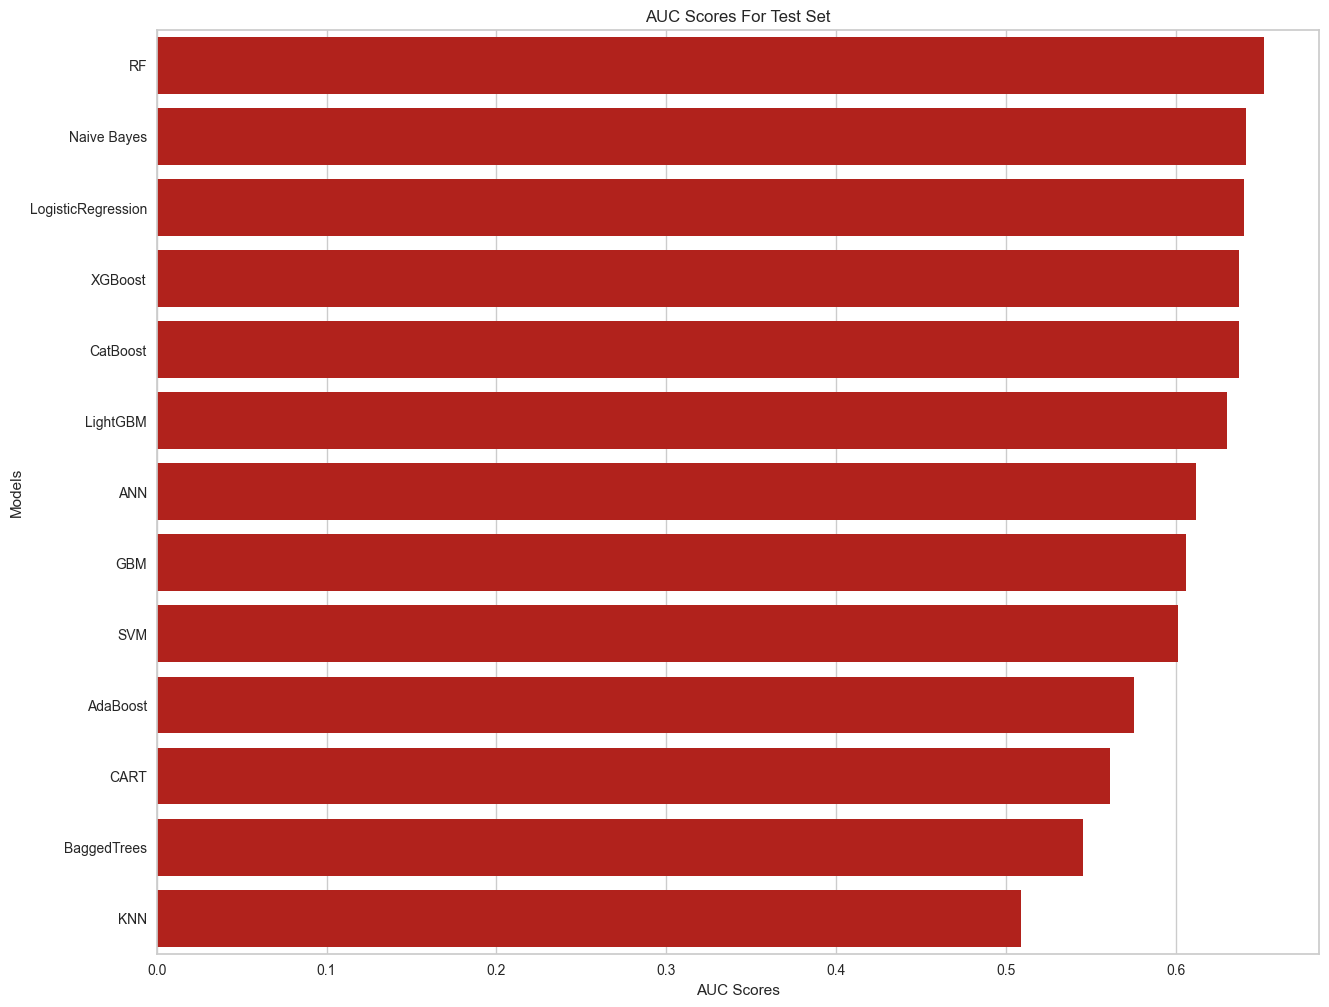

In [54]:
evaluate_classification_model_holdout(base_models)

In [31]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [32]:
# # LogisticRegression with make_pipeline
# GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
# evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

In [33]:
# plot_feature_importances(GNBreg)
# plot_results(GNBreg)
# # report_results_quickly(GNBreg)
# plot_learning_curve(GNBreg)

In [34]:
# # LogisticRegression with make_pipeline
# KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
# evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

In [35]:
# # plot_feature_importances(KNNreg)
# plot_results(KNNreg)
# # report_results_quickly(KNNreg)
# plot_learning_curve(KNNreg)

In [36]:
# # LogisticRegression with make_pipeline
# MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
# evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [37]:
# # plot_feature_importances(MLPreg)
# plot_results(MLPreg)
# # report_results_quickly(MLPreg)
# plot_learning_curve(MLPreg)

In [38]:
# # LogisticRegression with make_pipeline
# DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
# evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

In [39]:
# # plot_feature_importances(DTreg)
# plot_results(DTreg)
# # report_results_quickly(DTreg)
# plot_learning_curve(DTreg)

In [40]:
# # LogisticRegression with make_pipeline
# BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
# evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

In [41]:
# # plot_feature_importances(BCreg)
# plot_results(BCreg)
# # report_results_quickly(BCreg)
# plot_learning_curve(BCreg)

In [42]:
# # LogisticRegression with make_pipeline
# GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
# evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [43]:
# # plot_feature_importances(GBMreg)
# plot_results(GBMreg)
# # report_results_quickly(GBMreg)
# plot_learning_curve(GBMreg)

In [44]:
# # LogisticRegression with make_pipeline
# ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
# evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [45]:
# # plot_feature_importances(ABreg)
# plot_results(ABreg)
# # report_results_quickly(ABreg)
# plot_learning_curve(ABreg)

In [46]:
# # LogisticRegression with make_pipeline
# ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
# evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [47]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [48]:
# # KNN with make_pipeline
# knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
# evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [49]:
# # plot_feature_importances(knn)
# plot_results(knn)
# # report_results_quickly(knn)
# plot_learning_curve(knn)

In [50]:
# # SVC with make_pipeline
# svc = make_pipeline(RobustScaler(), SVC())
# evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [51]:
# # plot_feature_importances(svc)
# plot_results(svc)
# # report_results_quickly(svc)
# plot_learning_curve(svc)

In [52]:
# # ANN with make_pipeline
# ann = make_pipeline(StandardScaler(), MLPClassifier())
# evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [55]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 25, 'penalty': 'l2'}

In [56]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
# roc_auc_score(y_test, y_pred)
multiclass_roc_auc_score(y_test, y_pred, average="macro")

0.6400815217391305

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM3-LR', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM3-LR.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.62      0.72      0.67        32
    EGFR E19       0.64      0.30      0.41        23
    EGFR E21       0.40      0.52      0.45        23

    accuracy                           0.54        78
   macro avg       0.55      0.51      0.51        78
weighted avg       0.56      0.54      0.53        78

precision 0.5526617526617527 accuracy 0.5384615384615384 recall 0.5149456521739131 auc 0.6400815217391305


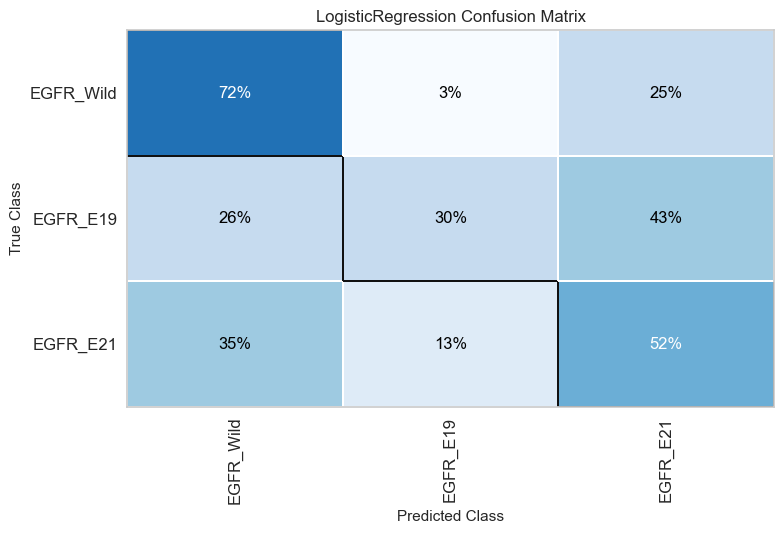

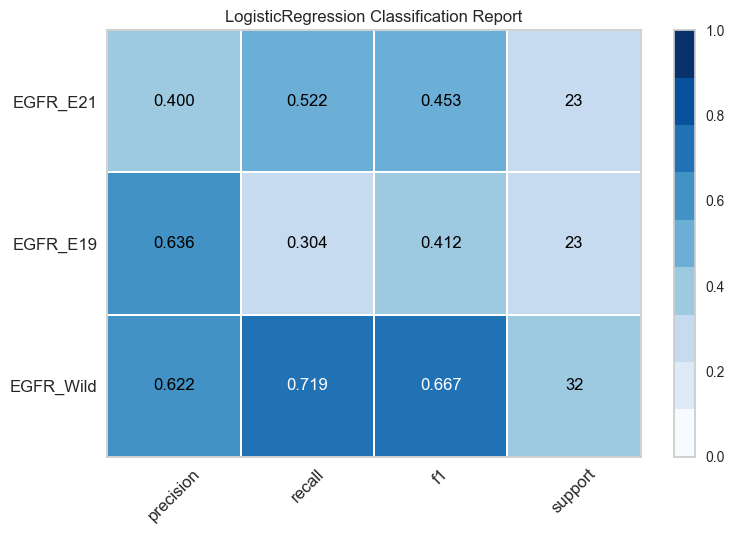

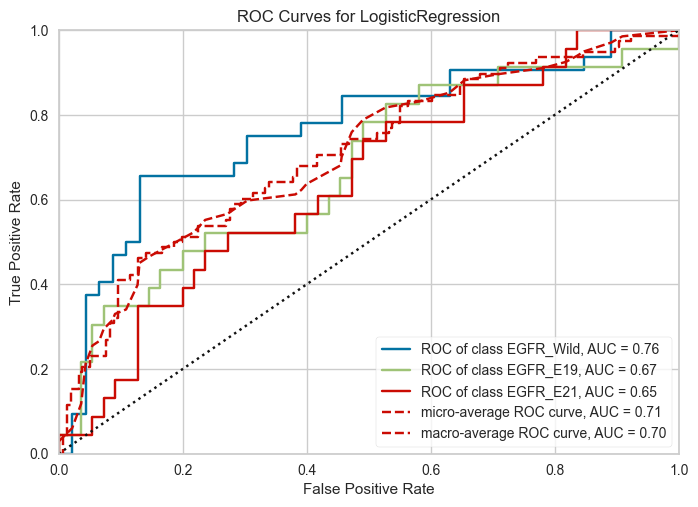

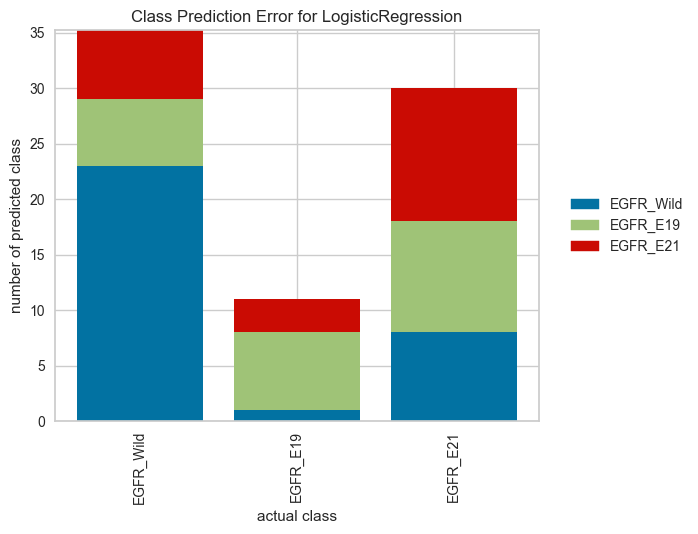

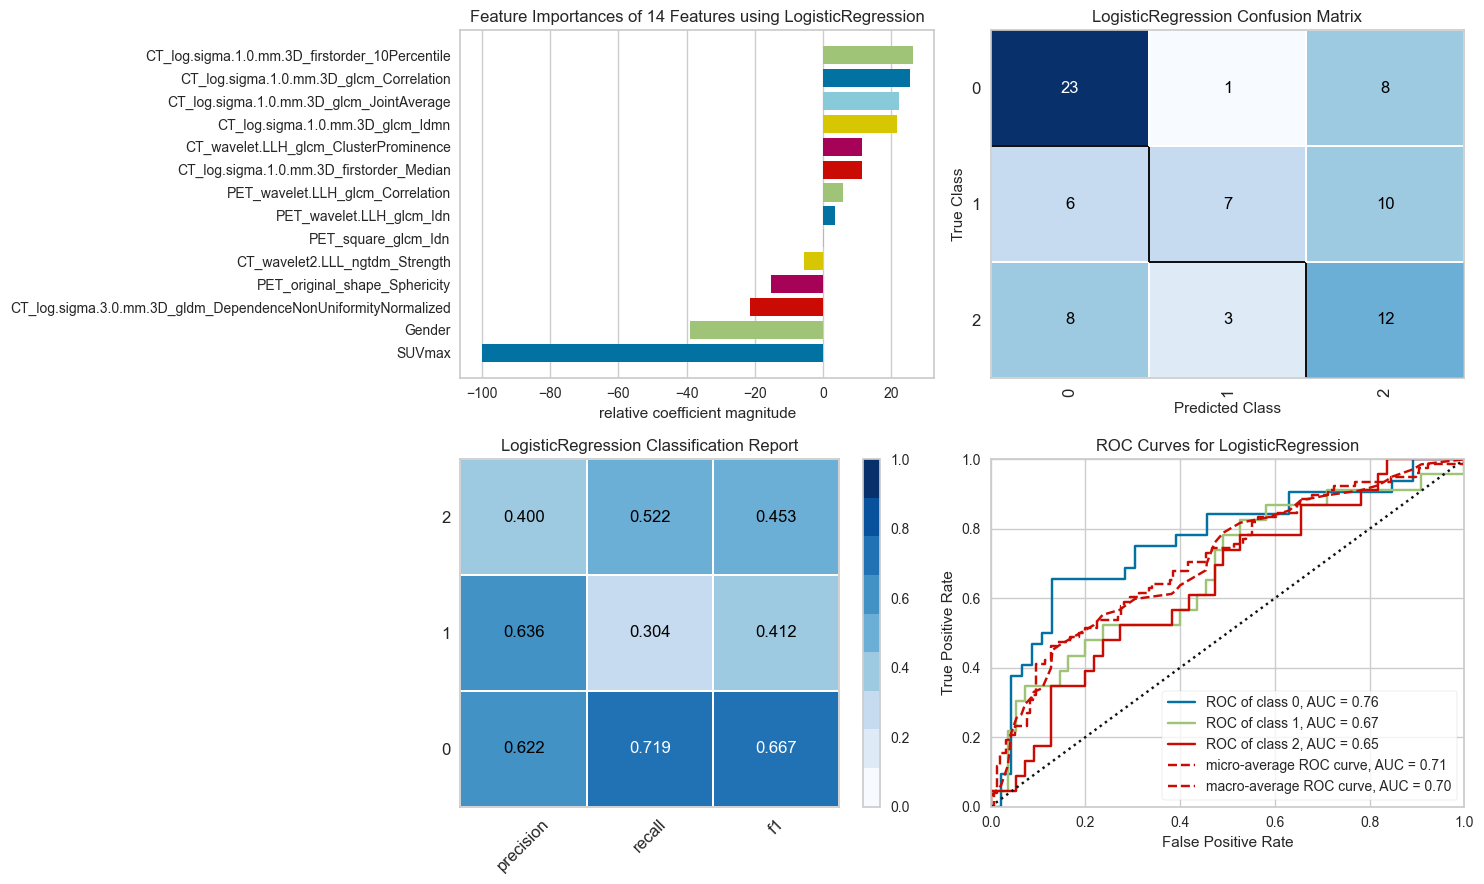

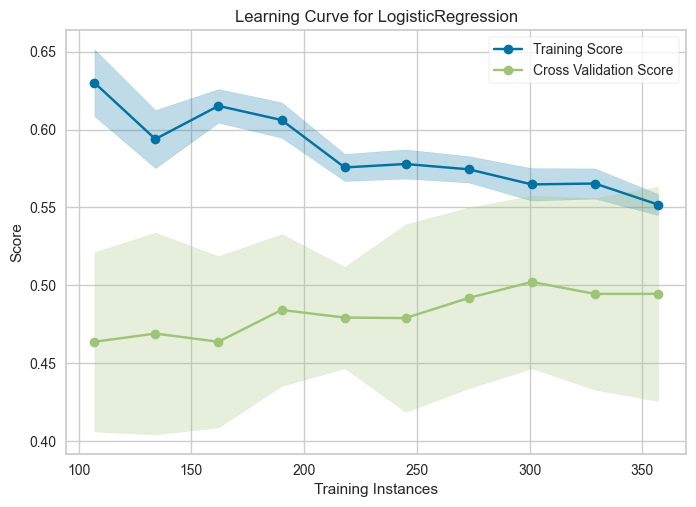

In [59]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [65]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [1,2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 4200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\z

{'max_depth': None, 'min_samples_split': 30, 'n_estimators': 5000}

In [66]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8831168831168831
# roc_auc_score(y_test, y_pred)
multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.6497653162055336

In [67]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-RF', Save_format = 'csv',Save_type = 'col')

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-RF.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.61      0.72      0.66        32
    EGFR E19       0.58      0.30      0.40        23
    EGFR E21       0.46      0.57      0.51        23

    accuracy                           0.55        78
   macro avg       0.55      0.53      0.52        78
weighted avg       0.56      0.55      0.54        78

precision 0.5509607351712615 accuracy 0.5512820512820513 recall 0.5294384057971014 auc 0.6497653162055336


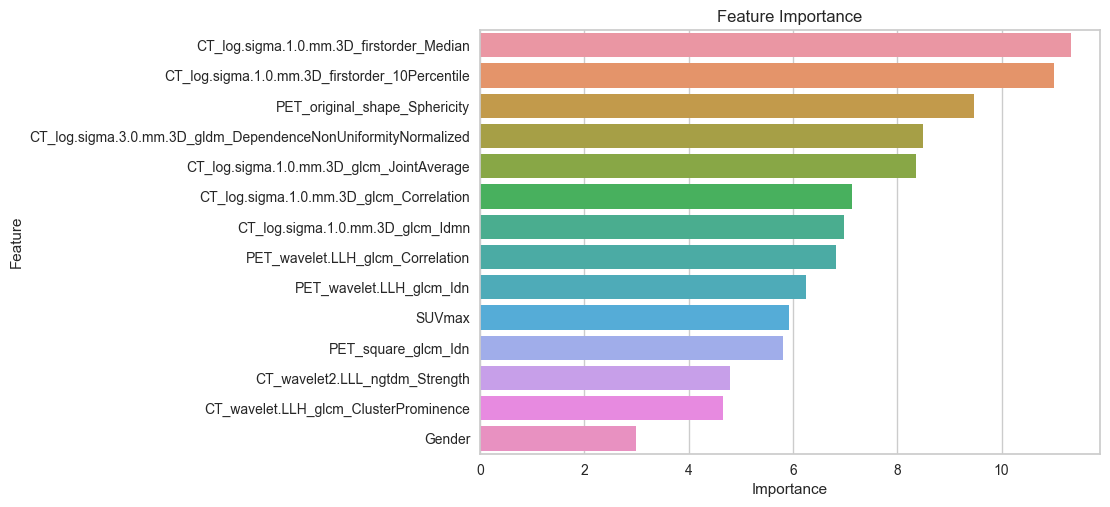

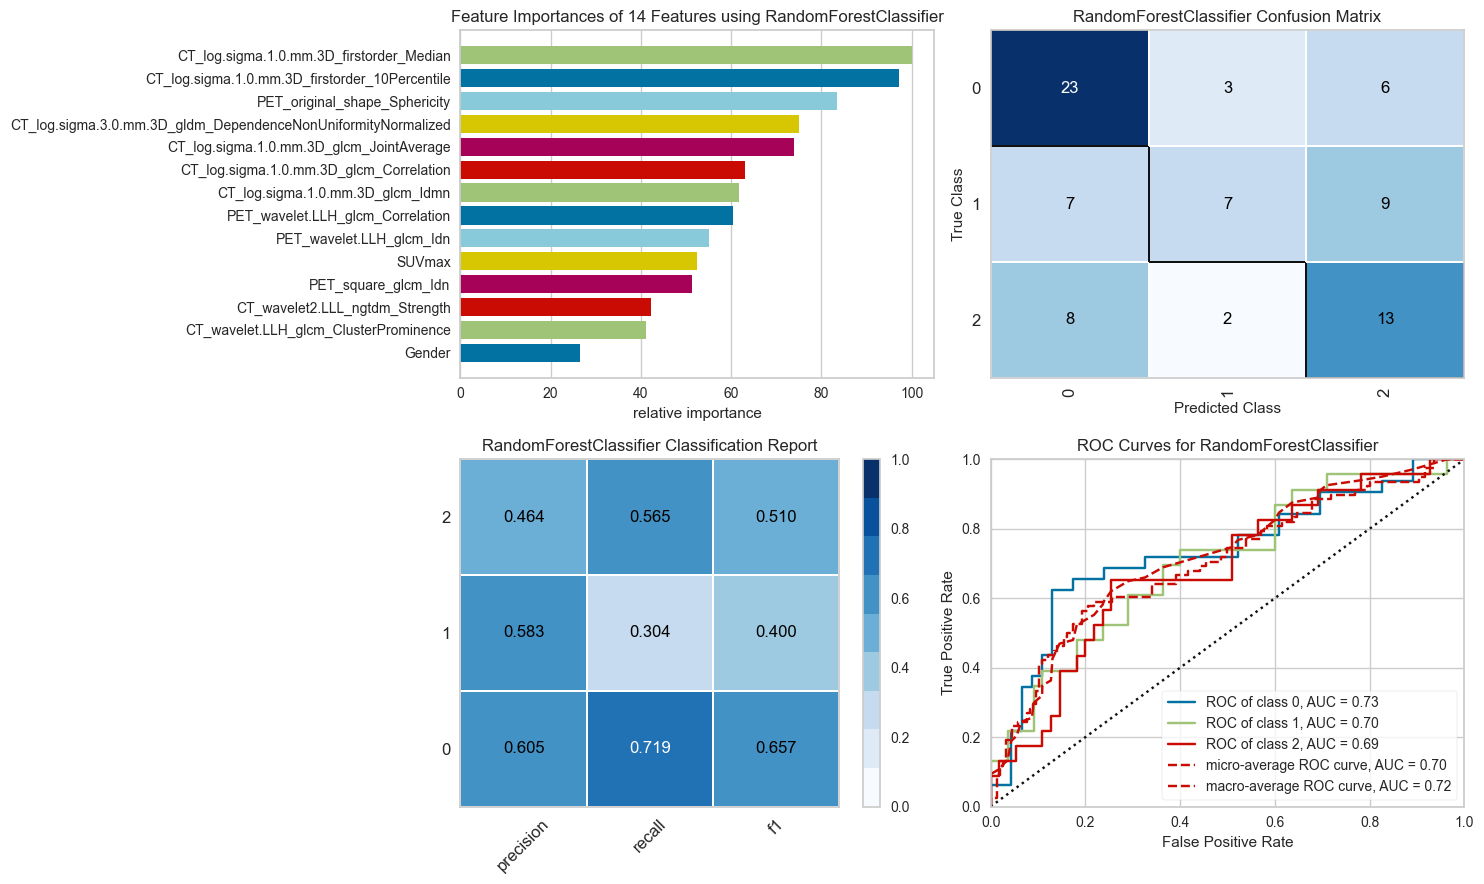

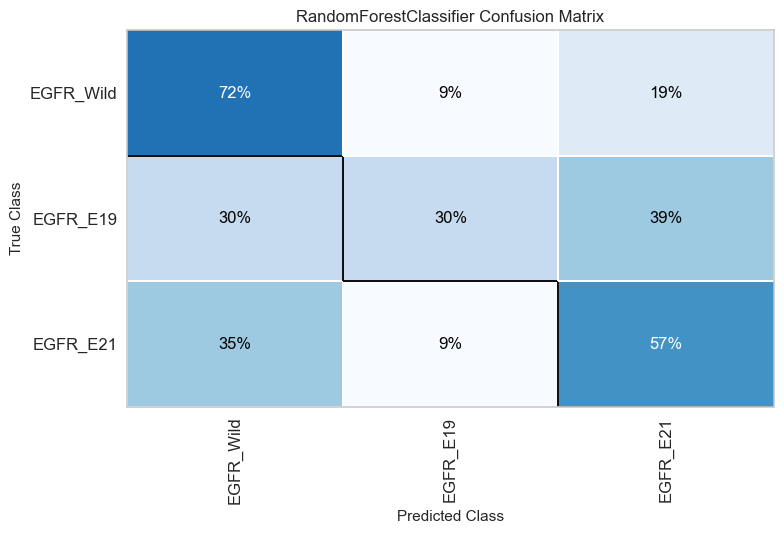

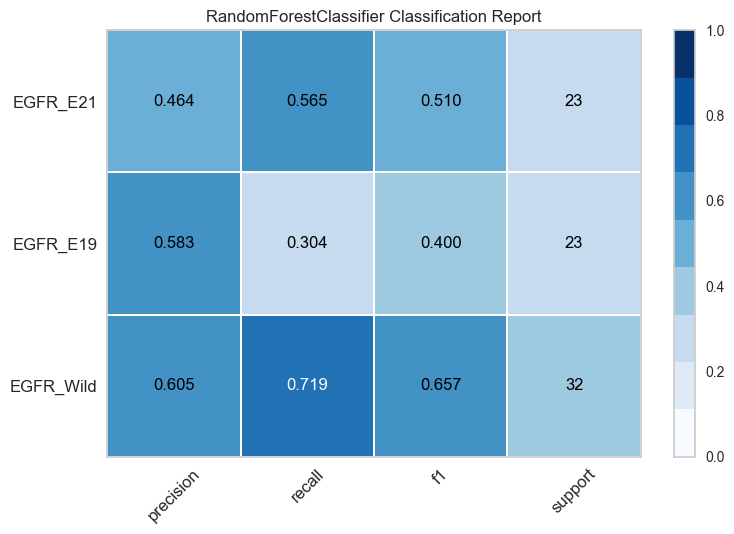

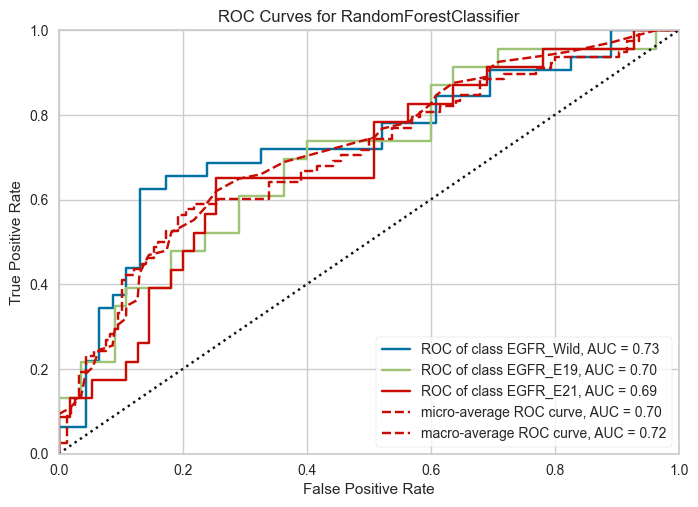

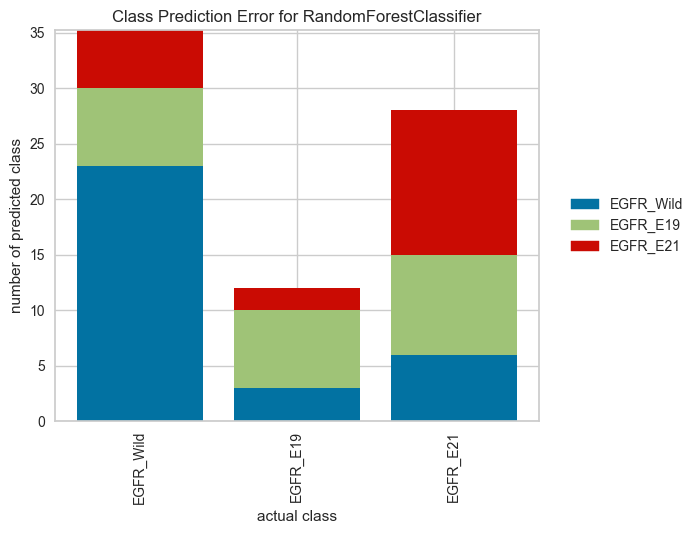

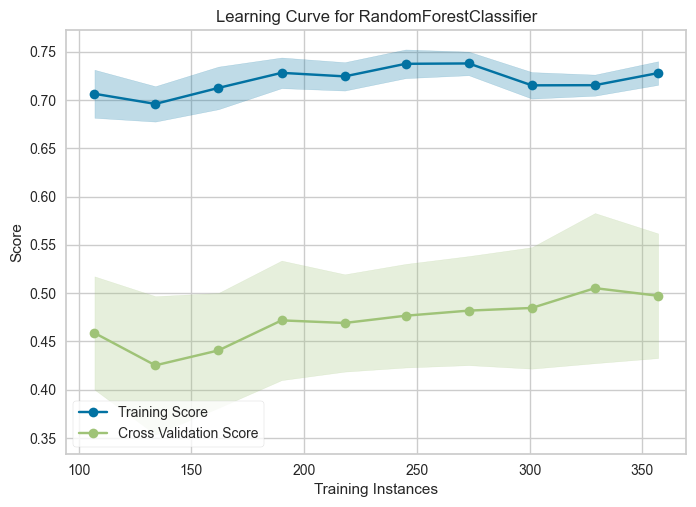

In [69]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [42]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None],
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.6191360	total: 922us	remaining: 184ms
1:	learn: 0.5313958	total: 1.75ms	remaining: 173ms
2:	learn: 0.4680038	total: 2.42ms	remaining: 159ms
3:	learn: 0.4175317	total: 3.09ms	remaining: 152ms
4:	learn: 0.3815031	total: 3.79ms	remaining: 148ms
5:	learn: 0.3249152	total: 4.51ms	remaining: 146ms
6:	learn: 0.2921771	total: 5.18ms	remaining: 143ms
7:	learn: 0.2705618	total: 5.86ms	remaining: 141ms
8:	learn: 0.2358219	total: 6.52ms	remaining: 138ms
9:	learn: 0.2117362	total: 7.19ms	remaining: 137ms
10:	learn: 0.1931905	total: 7.85ms	remaining: 135ms
11:	learn: 0.1659732	total: 8.54ms	remaining: 134ms
12:	learn: 0.1515749	total: 9.19ms	remaining: 132ms
13:	learn: 0.1425993	total: 9.95ms	remaining: 132ms
14:	learn: 0.1321885	total: 10.6ms	remaining: 131ms
15:	learn: 0.1211699	total: 11.4ms	remaining: 131ms
16:	learn: 0.1019875	total: 12.1ms	remaining: 130ms
17:	learn: 0.0969897	total: 12.6ms	remaining: 128ms
18:	learn:

{'early_stopping_rounds': 2000,
 'iterations': 200,
 'learning_rate': 0.3,
 'max_depth': 5}

In [44]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0:	learn: 0.6191360	total: 818us	remaining: 163ms
1:	learn: 0.5313958	total: 1.73ms	remaining: 171ms
2:	learn: 0.4680038	total: 2.43ms	remaining: 160ms
3:	learn: 0.4175317	total: 3.2ms	remaining: 157ms
4:	learn: 0.3815031	total: 3.99ms	remaining: 156ms
5:	learn: 0.3249152	total: 4.72ms	remaining: 153ms
6:	learn: 0.2921771	total: 5.49ms	remaining: 151ms
7:	learn: 0.2705618	total: 6.27ms	remaining: 150ms
8:	learn: 0.2358219	total: 7.05ms	remaining: 150ms
9:	learn: 0.2117362	total: 7.82ms	remaining: 149ms
10:	learn: 0.1931905	total: 8.65ms	remaining: 149ms
11:	learn: 0.1659732	total: 9.41ms	remaining: 147ms
12:	learn: 0.1515749	total: 10.1ms	remaining: 146ms
13:	learn: 0.1425993	total: 10.9ms	remaining: 145ms
14:	learn: 0.1321885	total: 11.6ms	remaining: 143ms
15:	learn: 0.1211699	total: 12.3ms	remaining: 142ms
16:	learn: 0.1019875	total: 13ms	remaining: 140ms
17:	learn: 0.0969897	total: 13.6ms	remaining: 138ms
18:	learn: 0.0901299	total: 14.3ms	remaining: 137ms
19:	learn: 0.0794840	total

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0.6666666666666666

In [45]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [46]:
# shap.dependence_plot(y_train, shap_values, X_train)

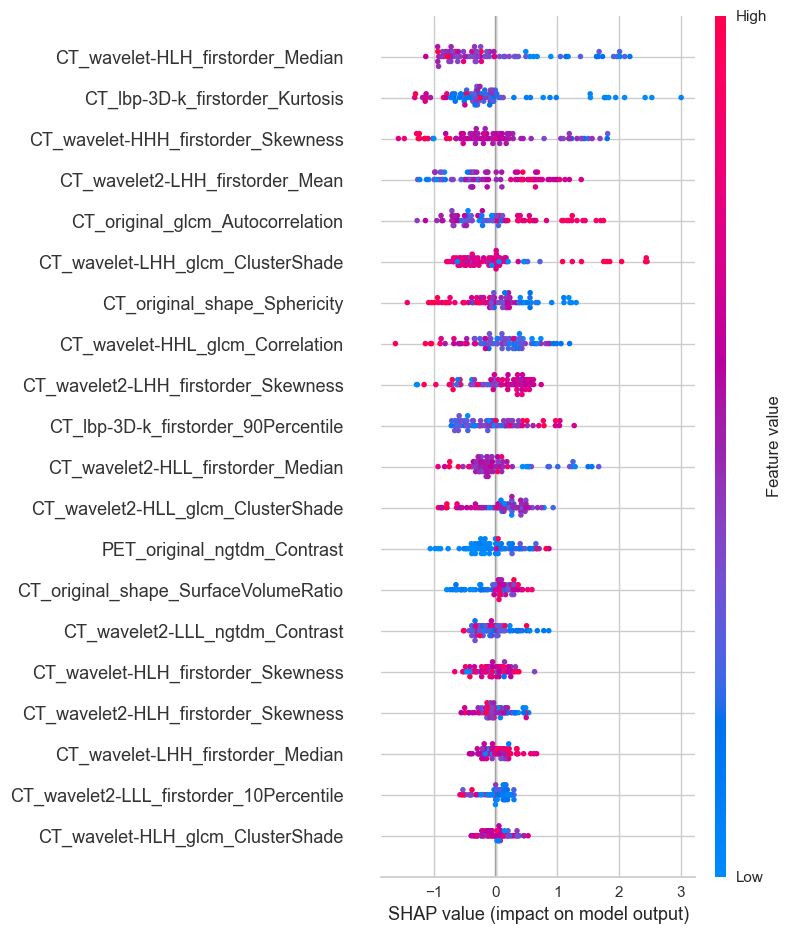

In [47]:

shap.summary_plot(shap_values, X_train)

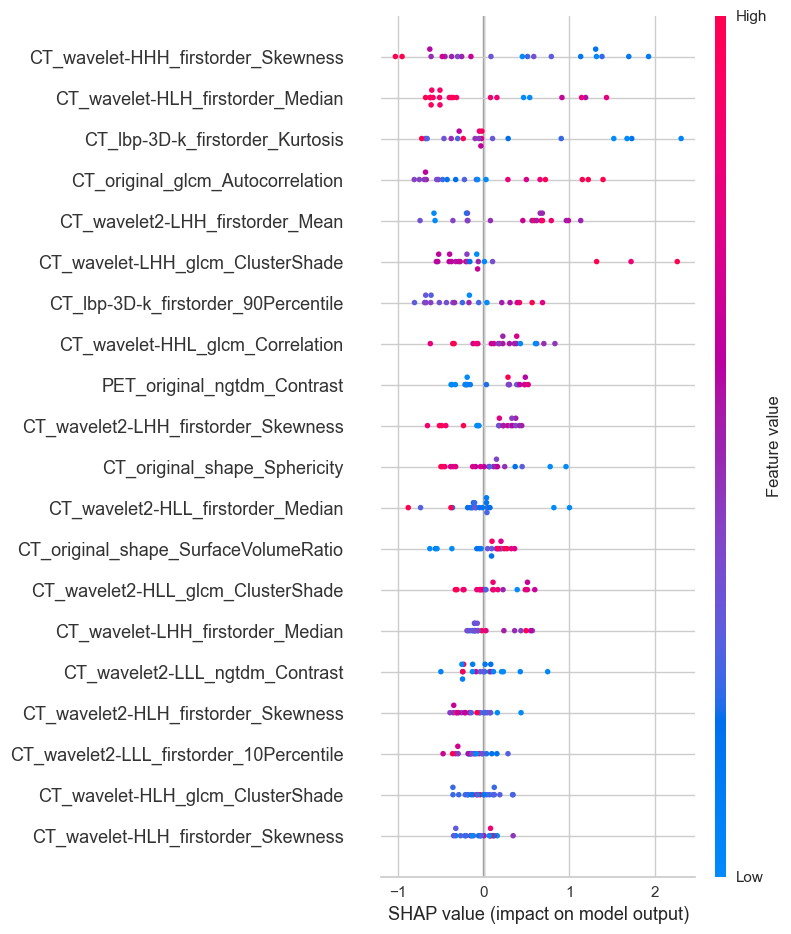

In [48]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [49]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [50]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-CBC73', Save_format = 'csv',Save_type = 'col')

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.55      0.63        11
    EGFR E21       0.62      0.80      0.70        10

    accuracy                           0.67        21
   macro avg       0.68      0.67      0.66        21
weighted avg       0.69      0.67      0.66        21

precision 0.6153846153846154 accuracy 0.6666666666666666 recall 0.8 auc 0.6727272727272727


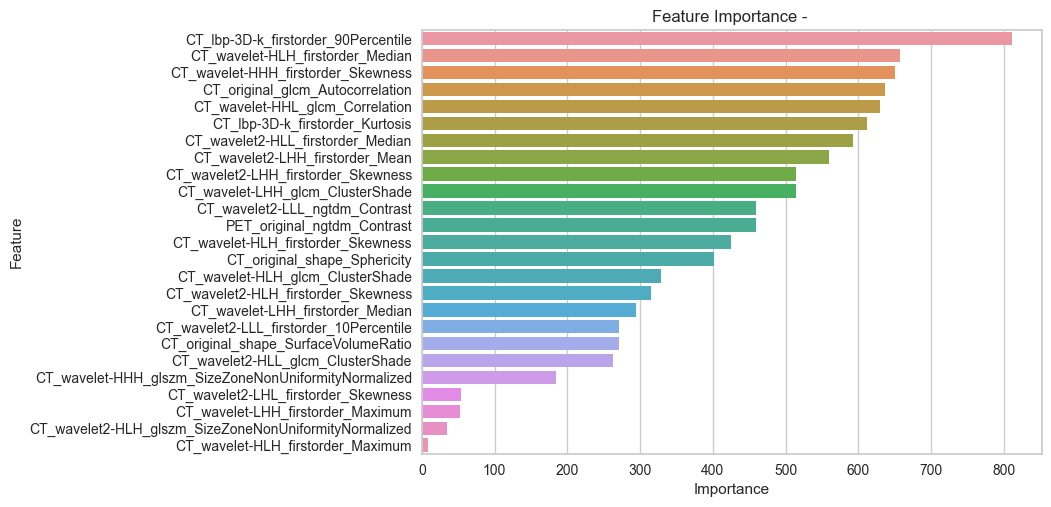

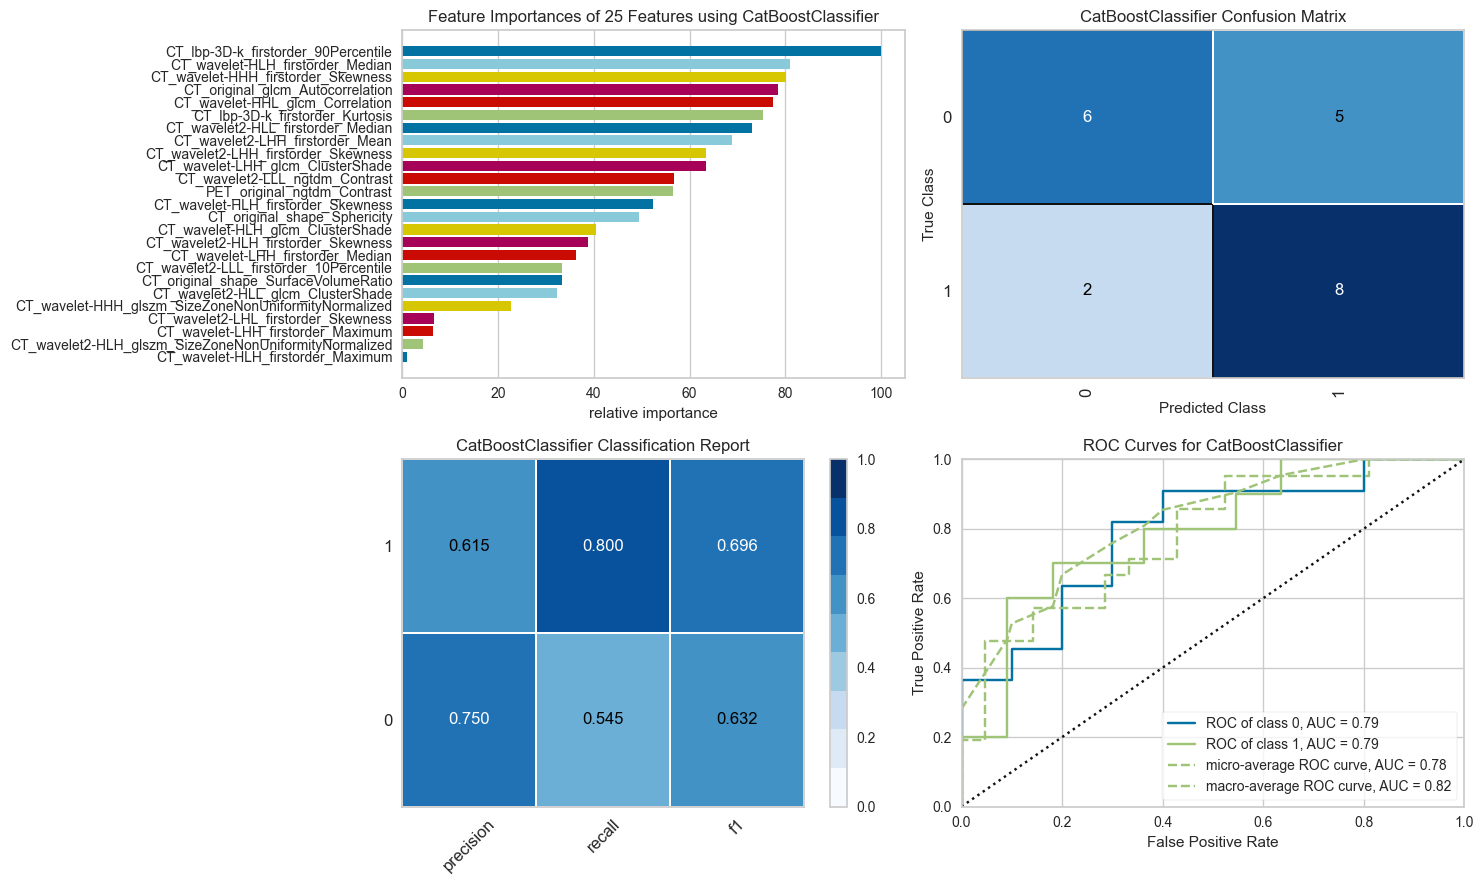

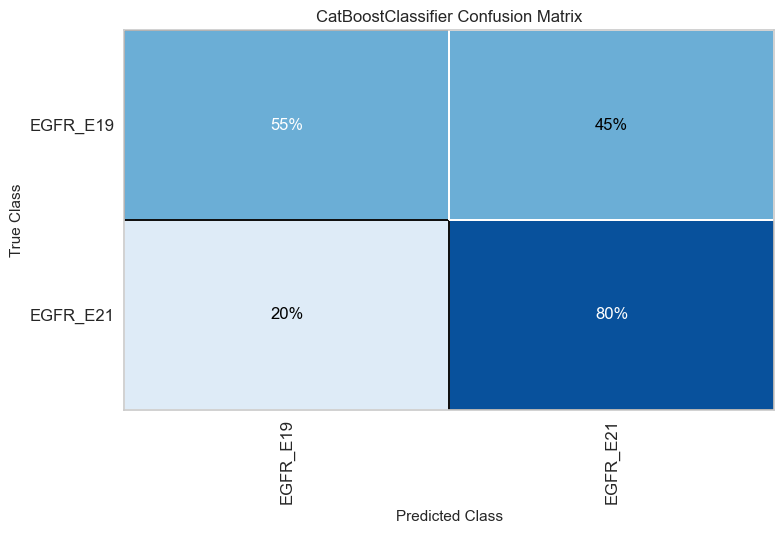

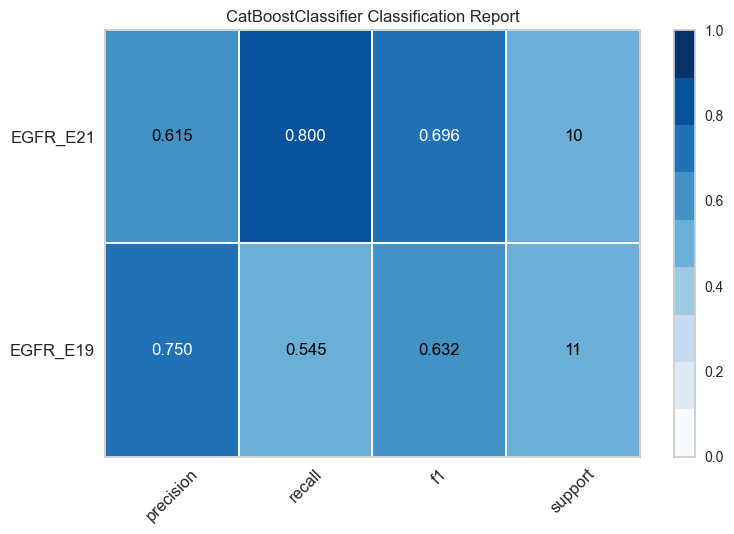

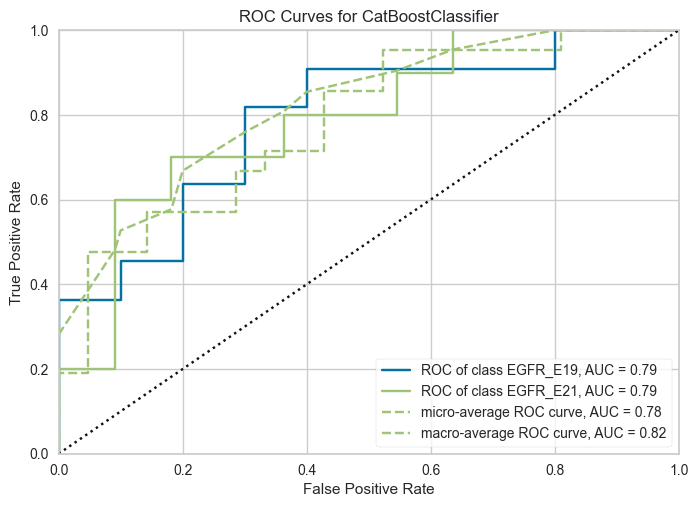

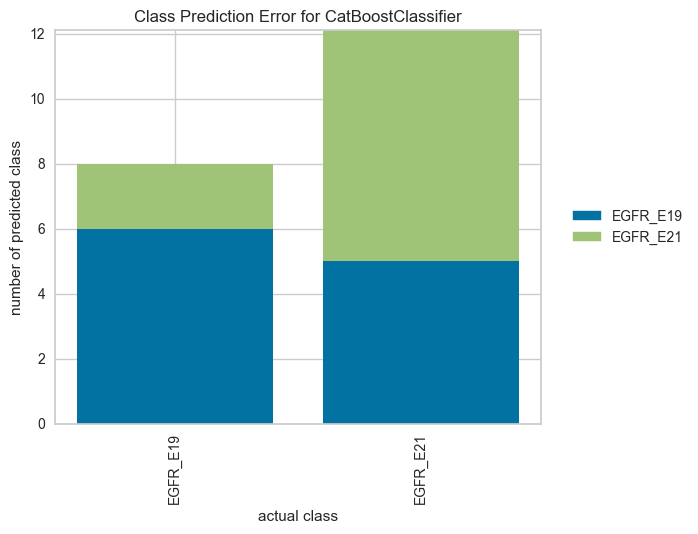

TypeError: __init__() got an unexpected keyword argument 'iterations'

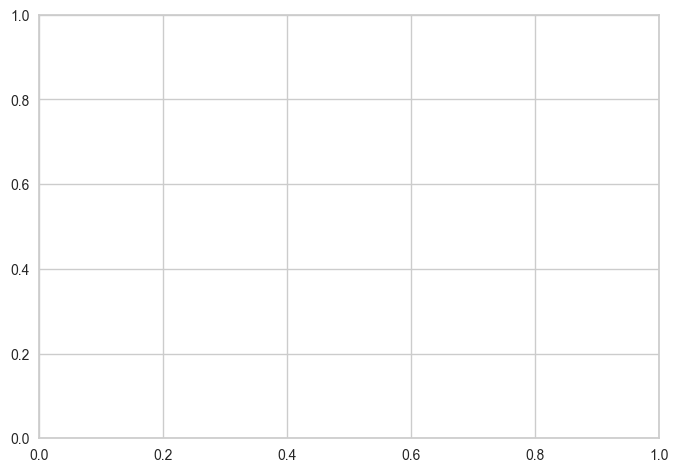

In [52]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [35]:
# # NGBClassifier # 0.883117
# from ngboost import NGBClassifier
# from ngboost.distns import Bernoulli
# from ngboost.distns import k_categorical
# ngb_model = NGBClassifier(Dist=k_categorical(2), verbose=False)
# ngb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
# #               "subsample": [0.5, 0.9, 1.0],
#               "n_estimators": [ 200,300,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
# #               "max_features": [3,4,5],
# #               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
# #               "max_depth": [1,2,3, None]
#              } #,4, 5, 8

# ngb_cv_model = GridSearchCV(ngb_model, ngb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
# ngb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

In [36]:
# # Final Model
# ngb_tuned = NGBClassifier(**ngb_cv_model.best_params_).fit(X_train, y_train)
# y_pred = ngb_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8766233766233766

In [55]:
# Data = {'label':y_test, 'y_pred':y_pred}
# Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LASSO-NGB73', Save_format = 'csv',Save_type = 'col')

In [37]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import missingno as msno

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from ngboost import NGBClassifier

# import os
# import pickle

# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
# from yellowbrick.model_selection import LearningCurve, FeatureImportances


# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# pd.pandas.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # # Load the model that we saved before
# data1 = pd.read_csv("Inter-test-for-auc-dca-LASSO-NGB73.csv")
# external_test_pred=data1.y_pred
# external_test_label=data1.label
# # auc = roc_auc_score(external_test_label, external_test_pred)
# # multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# # f1_score = f1_score(external_test_label, external_test_pred)
# # f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
# class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
# print(classification_report(external_test_label, external_test_pred, target_names=class_names))
# print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

In [57]:
# # # # Visualization of Results --> Feature Importances
# # # ngb_tuned = wrap(ngb_tuned)
# # # # plot_feature_importances(ngb_tuned)

# # # report_results_quickly(ngb_tuned)
# # # plot_results(ngb_tuned)
# # # plot_learning_curve(ngb_tuned)

# plot_confusion_matrix_yb(ngb_tuned)
# plot_classification_report_yb(ngb_tuned)
# plot_roc_auc_curve_yb(ngb_tuned)
# plot_class_prediction_error_yb(ngb_tuned)

In [70]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 200,500,800,1000,2000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 25 candidates, totalling 250 fits


{'learning_rate': 0.001, 'n_estimators': 1000}

In [71]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.48717948717948717

In [72]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-ADB73', Save_format = 'csv',Save_type = 'col')

In [73]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.59      0.72      0.65        32
    EGFR E19       0.00      0.00      0.00        23
    EGFR E21       0.38      0.65      0.48        23

    accuracy                           0.49        78
   macro avg       0.32      0.46      0.38        78
weighted avg       0.36      0.49      0.41        78

precision 0.3247863247863248 accuracy 0.48717948717948717 recall 0.4569746376811594 auc 0.5977890316205534


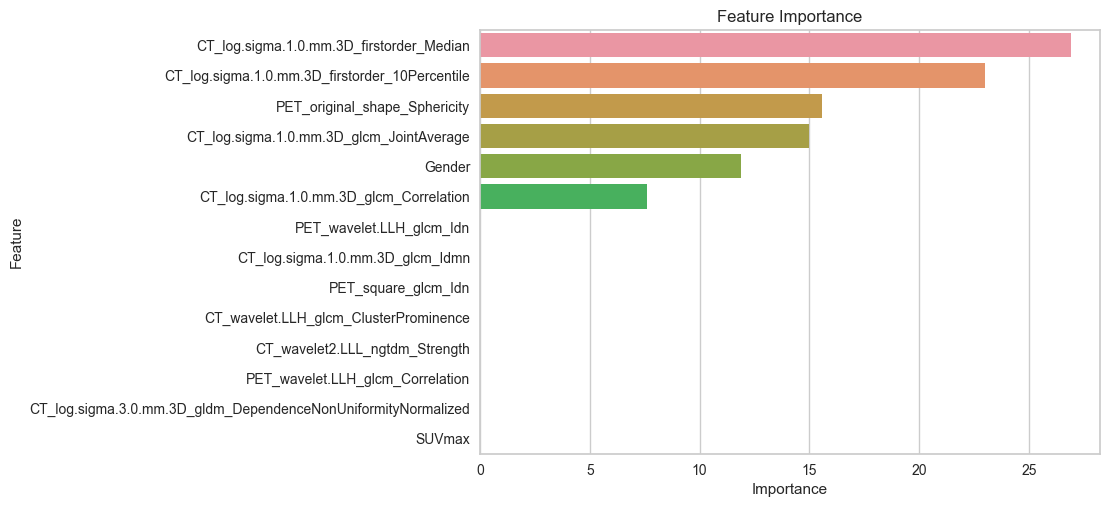

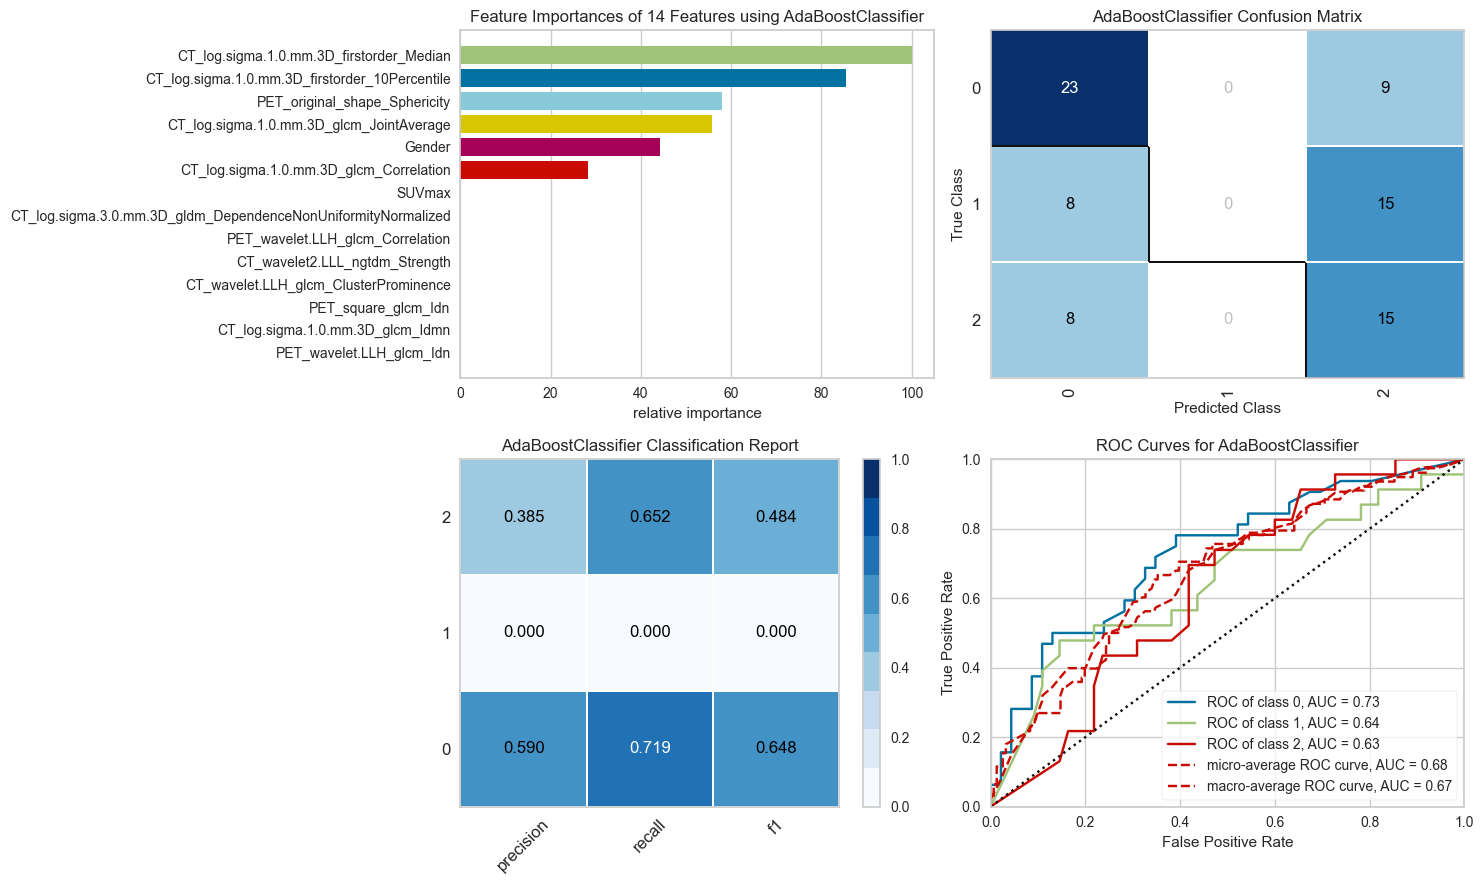

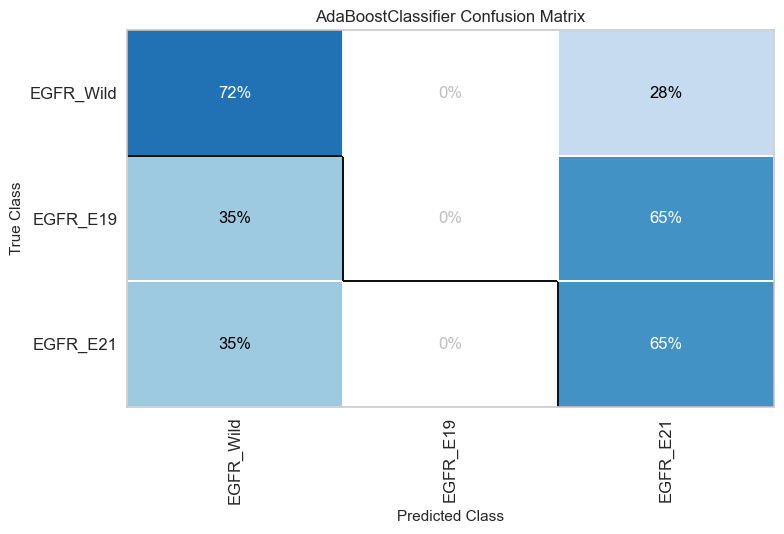

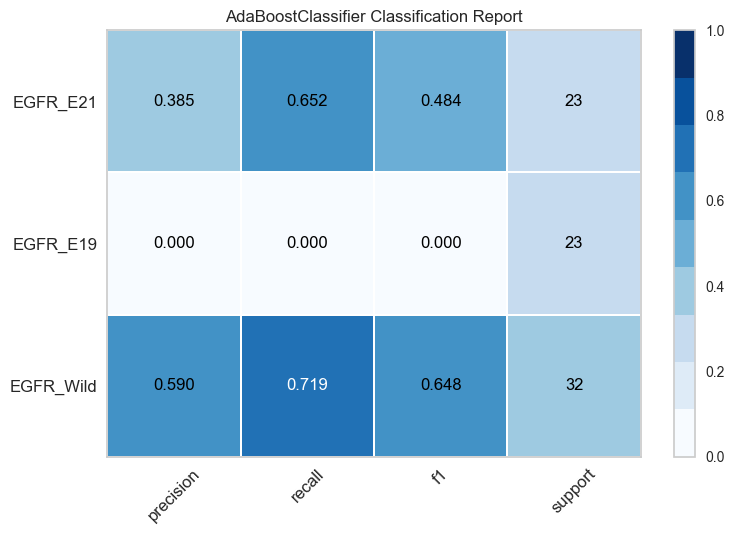

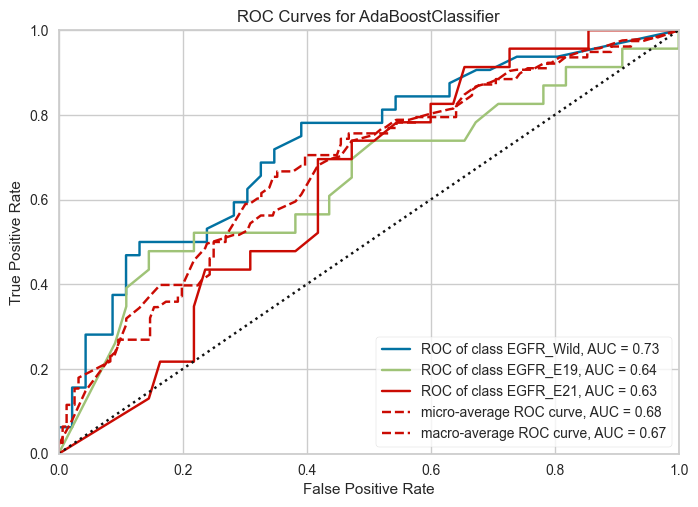

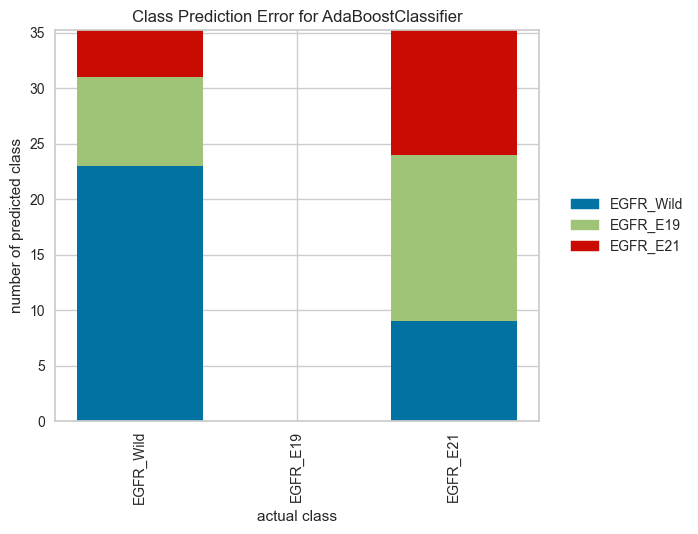

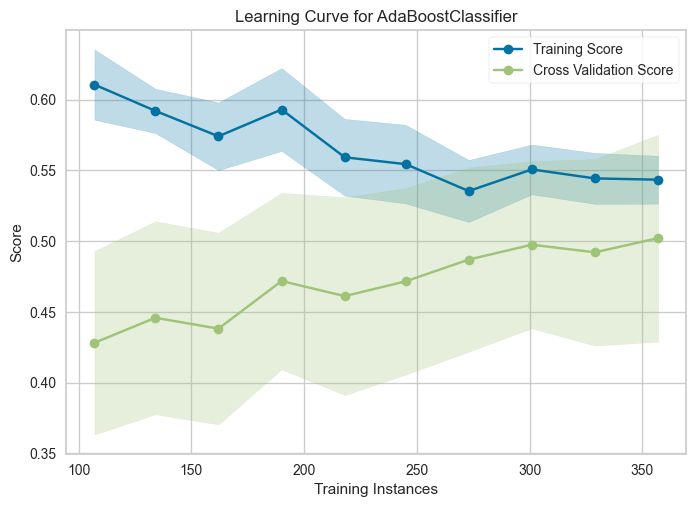

In [74]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)

report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [75]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.8}

In [76]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766
multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.6298048418972332

In [77]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-gbdt', Save_format = 'csv',Save_type = 'col')

In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.62      0.72      0.67        32
    EGFR E19       0.56      0.22      0.31        23
    EGFR E21       0.41      0.57      0.47        23

    accuracy                           0.53        78
   macro avg       0.53      0.50      0.48        78
weighted avg       0.54      0.53      0.51        78

precision 0.5278090590590591 accuracy 0.5256410256410257 recall 0.5004528985507246 auc 0.6298048418972332


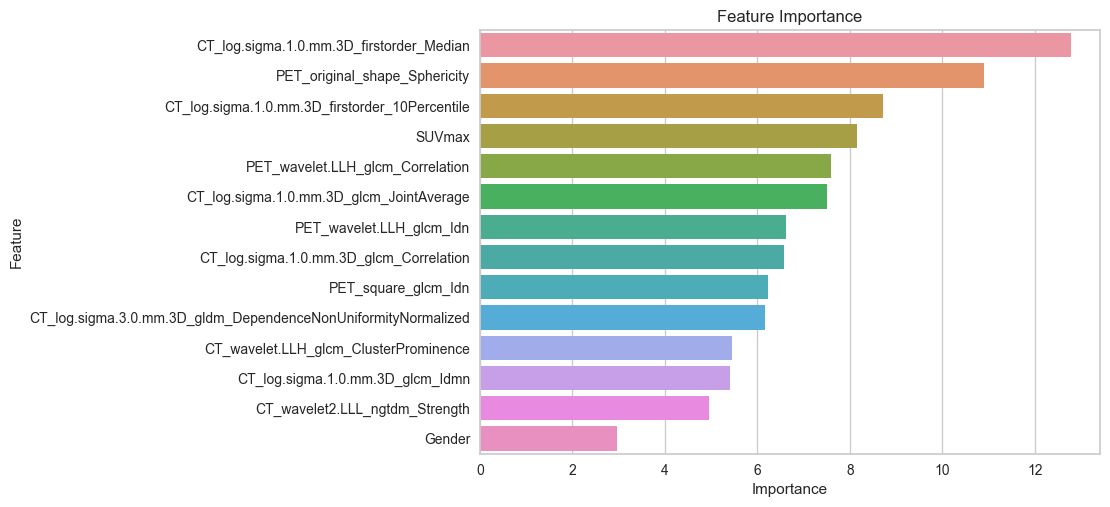

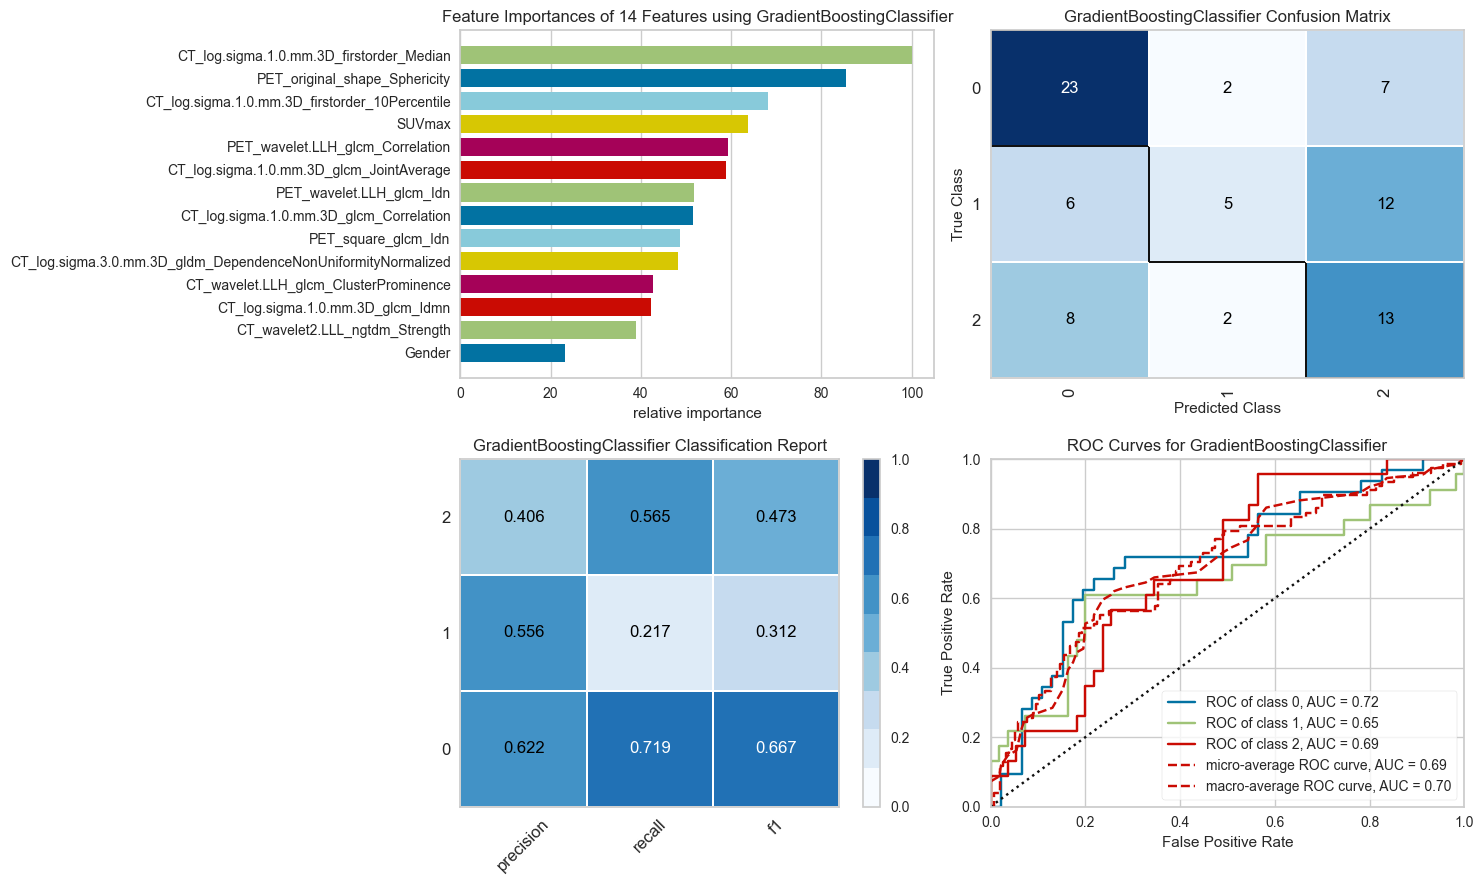

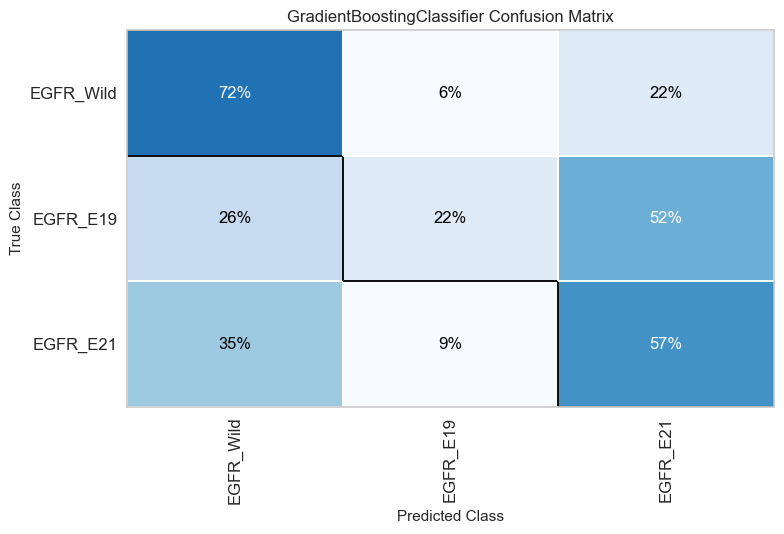

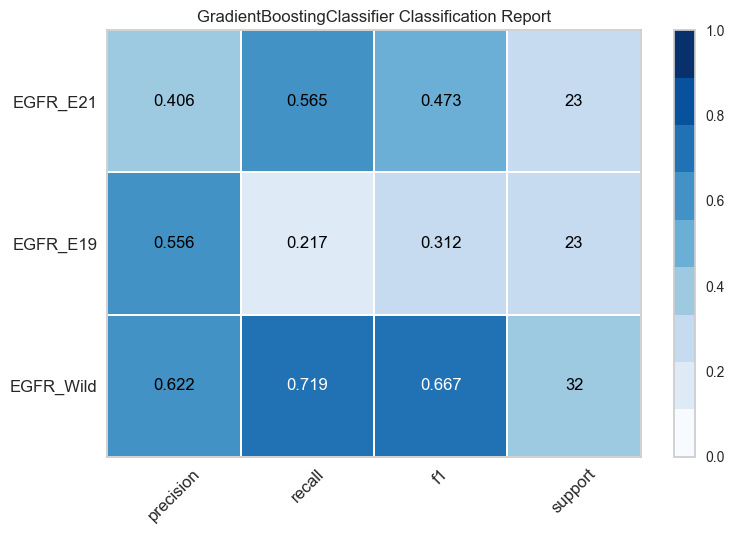

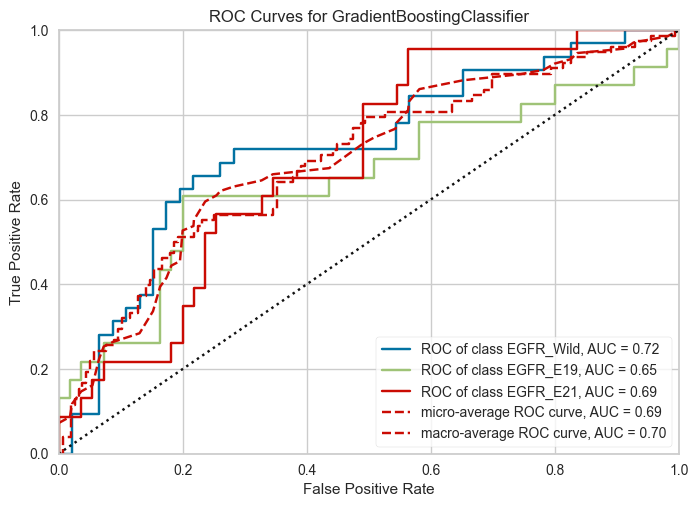

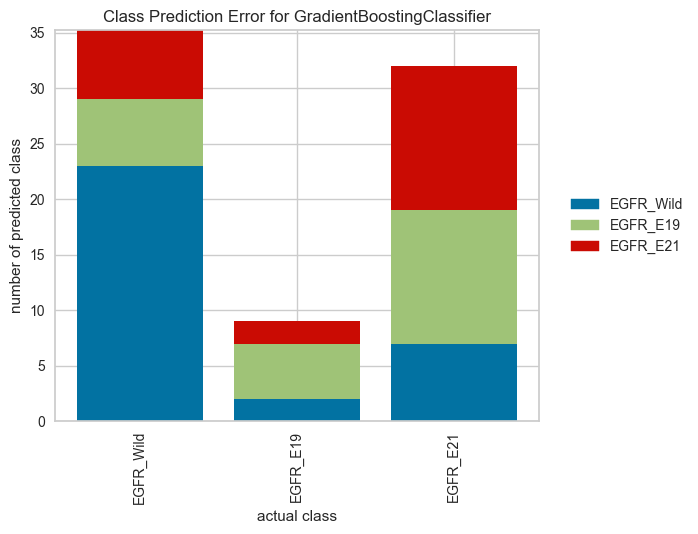

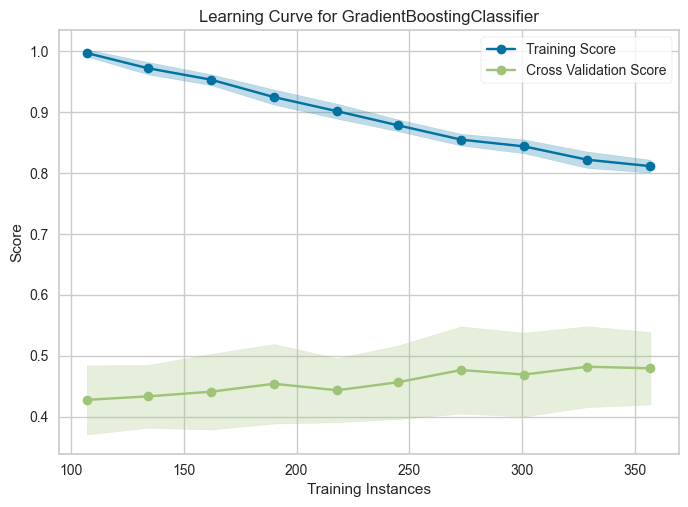

In [79]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [237]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [48]:
# # # DTClassifier # 0.883117

# from sklearn.tree import DecisionTreeClassifier
# dt_model = DecisionTreeClassifier()
# # dt_params = {
# # #     "learning_rate": [0.01, 0.1, 0.2, 0.5],              
# # #               "subsample": [0.5, 0.9, 1.0],
# # #               "n_estimators": [ 500,1000]#,2000,3000,5000,10000
# #               "max_features": [10,20,30,40],
# #               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
# #               "max_depth": [1,2,3,4,5,8,10, None]
# #              } #,4, 5, 8
# dt_params = [{'criterion':['gini'],'max_depth':[1,2,3,4,5,8,10,30,50,60,100,None],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
#          {'criterion':['gini','entropy'],'max_depth': [1,2,3,4,5,8,10,30,None], 'min_impurity_decrease':[0.1,0.2,0.5]}]


# dt_cv_model = GridSearchCV(dt_model, dt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
# dt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 198 candidates, totalling 1980 fits


{'criterion': 'gini',
 'max_depth': 1,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 2}

In [49]:
# # Final Model
# dt_tuned = DecisionTreeClassifier(**dt_cv_model.best_params_).fit(X_train, y_train)
# y_pred = dt_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8766233766233766
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
# # auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.5

In [50]:
# Data = {'label':y_test, 'y_pred':y_pred}
# Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFERF-dt', Save_format = 'csv',Save_type = 'col')

In [52]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import missingno as msno

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from ngboost import NGBClassifier

# import os
# import pickle

# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
# from yellowbrick.model_selection import LearningCurve, FeatureImportances


# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# pd.pandas.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # # Load the model that we saved before
# data1 = pd.read_csv("Inter-test-for-auc-dca-RFELR-dt.csv")
# external_test_pred=data1.y_pred
# external_test_label=data1.label
# # auc = roc_auc_score(external_test_label, external_test_pred)
# # multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# # f1_score = f1_score(external_test_label, external_test_pred)
# # f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
# class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
# print(classification_report(external_test_label, external_test_pred, target_names=class_names))
# print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

In [ ]:
# # # Visualization of Results --> Feature Importances
# # # dt_tuned = wrap(dt_tuned)
# plot_feature_importances(dt_tuned)

# report_results_quickly(dt_tuned)
# plot_results(dt_tuned)
# plot_learning_curve(dt_tuned)

In [80]:
# SVC # 0.876623
import sklearn.svm as svm
import sklearn.model_selection as ms
'''***************************超参数优化及GridSearchCV属性：start*******************************'''
# 最优超参数组合列表
params = [
        {'kernel': ['linear'], 'C': [1, 10, 100, 100]},
        {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
       ]

svm_model = ms.GridSearchCV(svm.SVC(), params, refit=True,return_train_score=True,cv=10).fit(X_train, y_train)
# model.fit(X_train, y_train)

# GridSearchCV的属性
print('Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv')
print('cv_results_:',svm_model.cv_results_.keys())
print('Desc:',svm_model.cv_results_['params'][2], svm_model.cv_results_['mean_train_score'][2], 
      svm_model.cv_results_['mean_test_score'][2],svm_model.cv_results_['rank_test_score'][2])
print('best_estimator_:',svm_model.best_estimator_) 
print('best_params_:',svm_model.best_params_) 
print('best_params_:', svm_model.cv_results_['params'][svm_model.best_index_])
print('best_score_:',svm_model.best_score_)
print('scorer_:',svm_model.scorer_)
print('n_splits_:',svm_model.n_splits_)
svm_cv_model = svm_model.best_params_
# rf_model = RandomForestClassifier(random_state=42)
# rf_params = {"n_estimators": [10,100, 200, 500, 1000,5000],
#              "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#              "max_depth": [1,2,3,4, 5, 8, None]}

# rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
# rf_cv_model.best_params_ # {'max_depth': 8, 'max_features': 5, 'min_samples_split': 30, 'n_estimators': 200}

Attrabutes:vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
cv_results_: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_degree', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])
Desc: {'C': 100, 'kernel': 'linear'} 0.5423729028978139 0.46451612903225803 5
best_estimator_: SVC(C=10, gamma=0.001)
best_params_: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
best_params_: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
best_score_: 0.48689516129

In [81]:
print(svm_model.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [82]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
# roc_auc_score = roc_auc_score(y_test, y_pred)
roc_auc_score = multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
print(ACC,roc_auc_score)

0.44871794871794873 0.5684041501976285


In [83]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-SVM73', Save_format = 'csv',Save_type = 'col')

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.56      0.69      0.62        32
    EGFR E19       0.00      0.00      0.00        23
    EGFR E21       0.33      0.57      0.42        23

    accuracy                           0.45        78
   macro avg       0.30      0.42      0.35        78
weighted avg       0.33      0.45      0.38        78

precision 0.29914529914529914 accuracy 0.44871794871794873 recall 0.4175724637681159 auc 0.5684041501976285


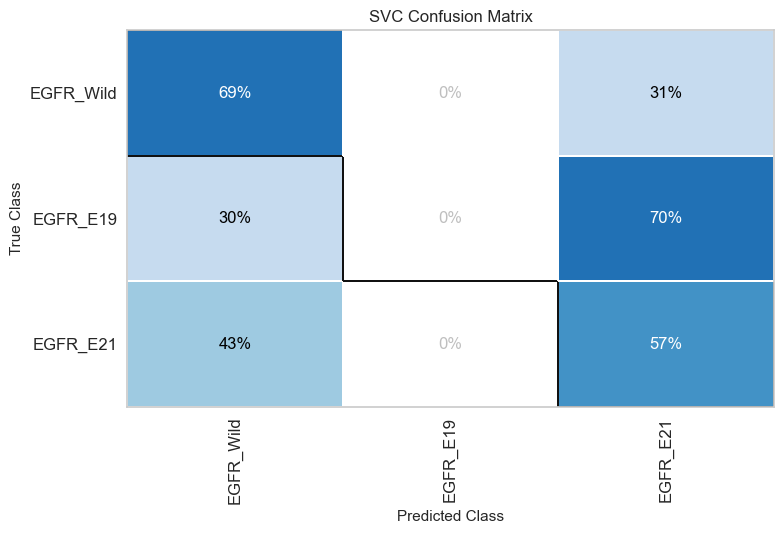

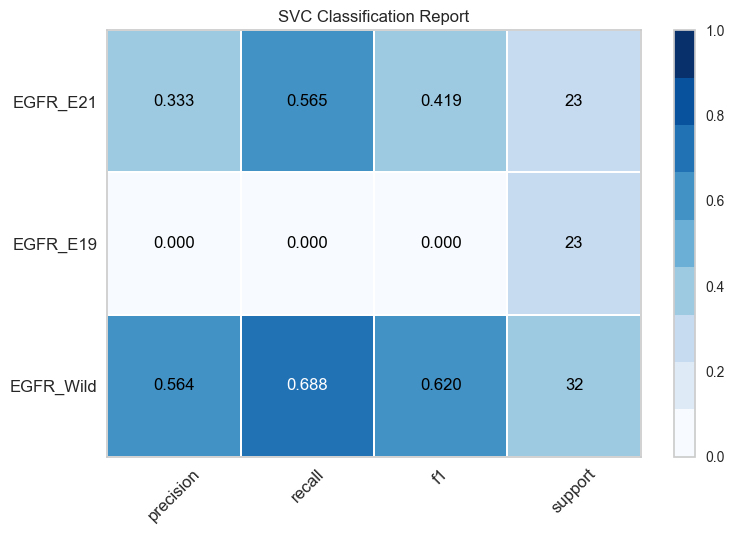

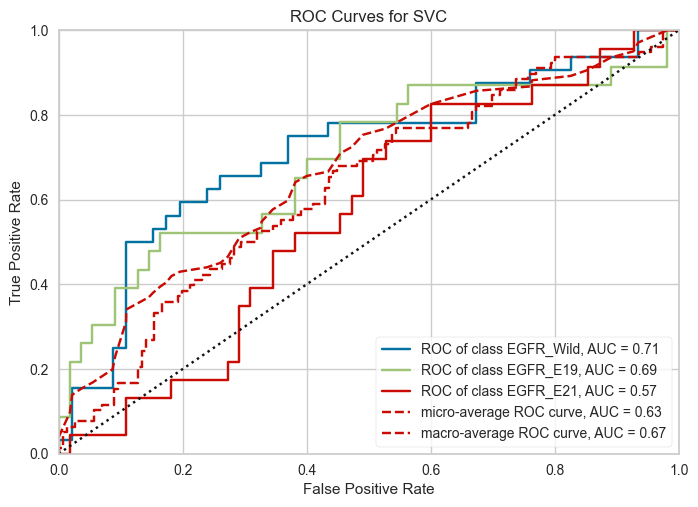

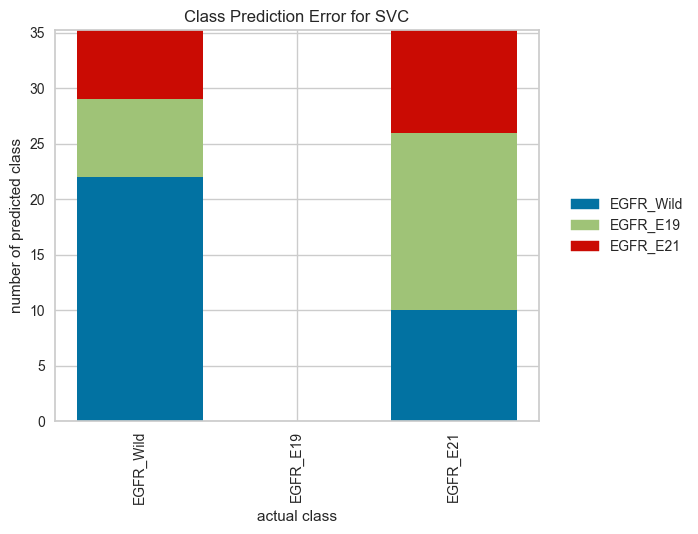

In [85]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [79]:

# logreg_tuned
# ngb_tuned
# adb_tuned
# gbdt_tuned
# dt_tuned
# svm_tuned

# cgb_tuned
# lgbm_tuned

# rf_tuned
# xgb_tuned



In [87]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,800,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 588 candidates, totalling 5880 fits


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500, 'subsample': 0.5}

In [88]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766
multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.6427124505928853

In [89]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-XGB73', Save_format = 'csv',Save_type = 'col')

In [90]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.63      0.69      0.66        32
    EGFR E19       0.60      0.26      0.36        23
    EGFR E21       0.42      0.61      0.50        23

    accuracy                           0.54        78
   macro avg       0.55      0.52      0.51        78
weighted avg       0.56      0.54      0.52        78

precision 0.550937950937951 accuracy 0.5384615384615384 recall 0.5190217391304348 auc 0.6427124505928853


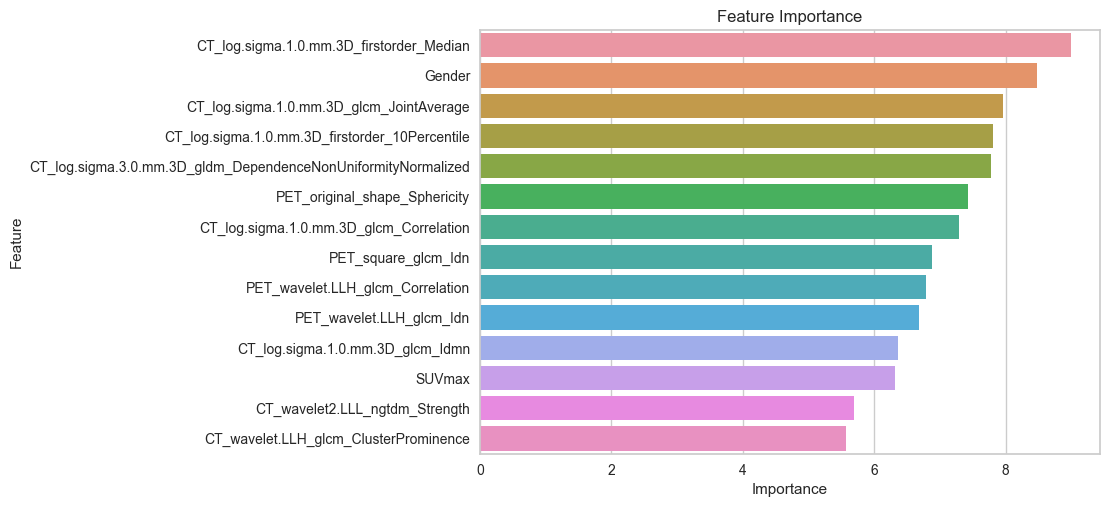

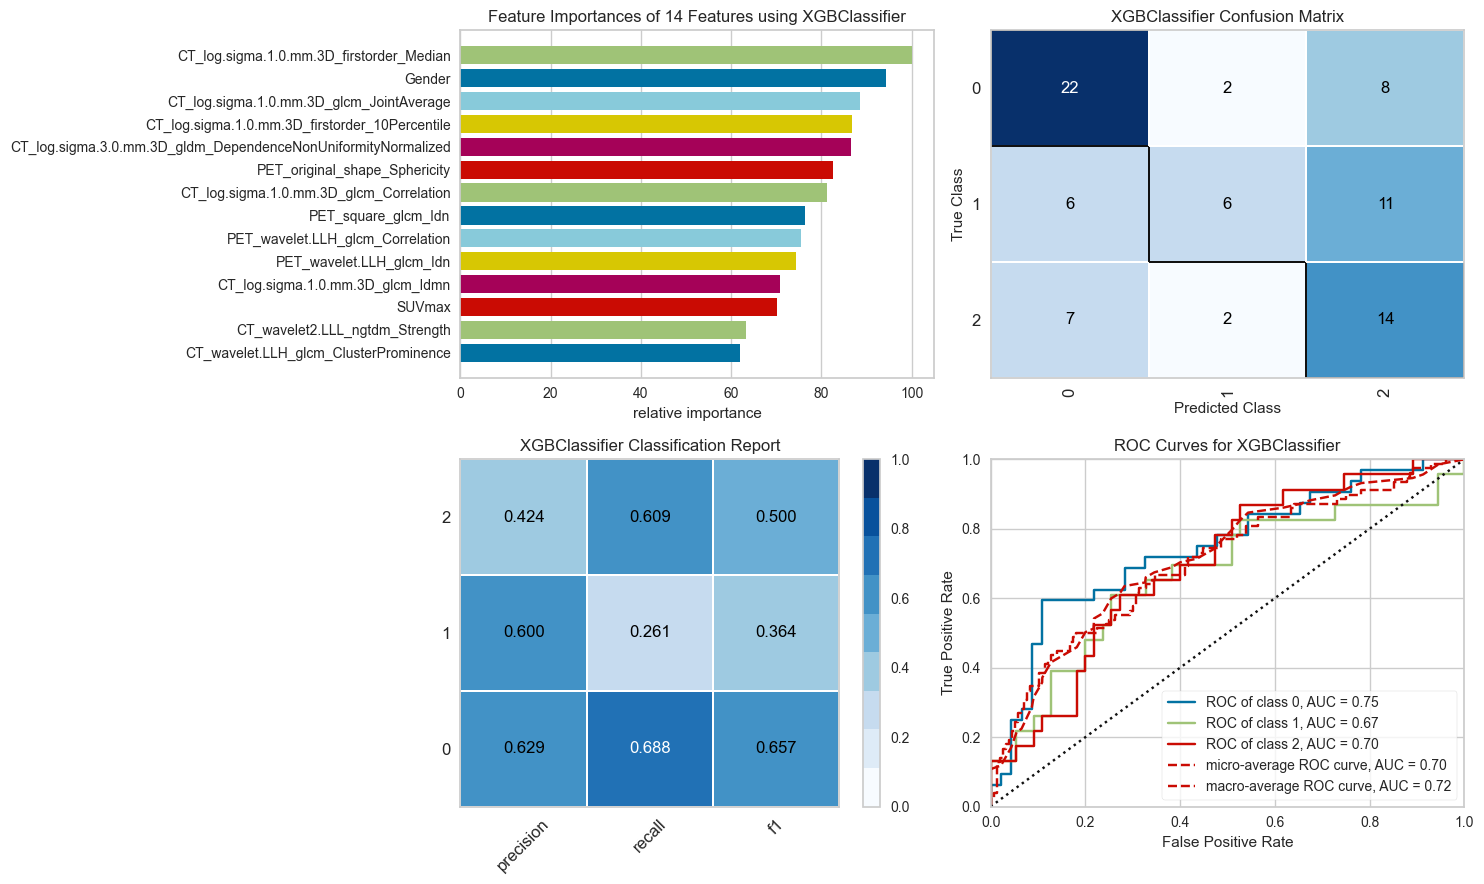

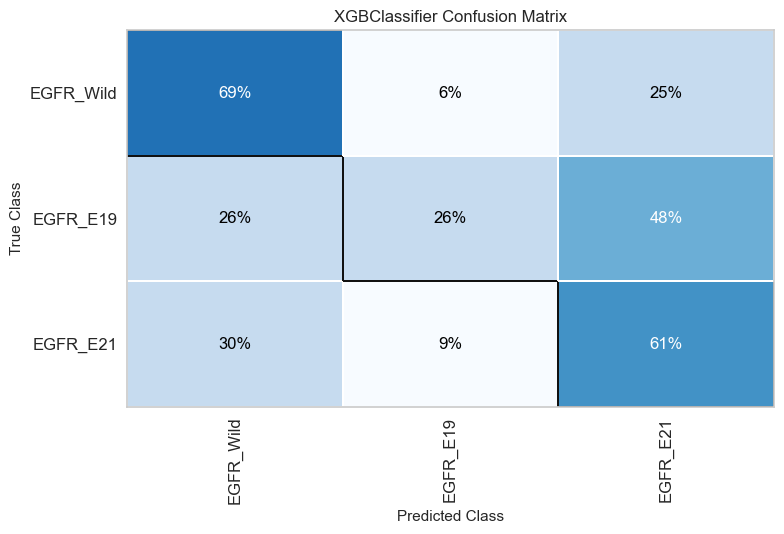

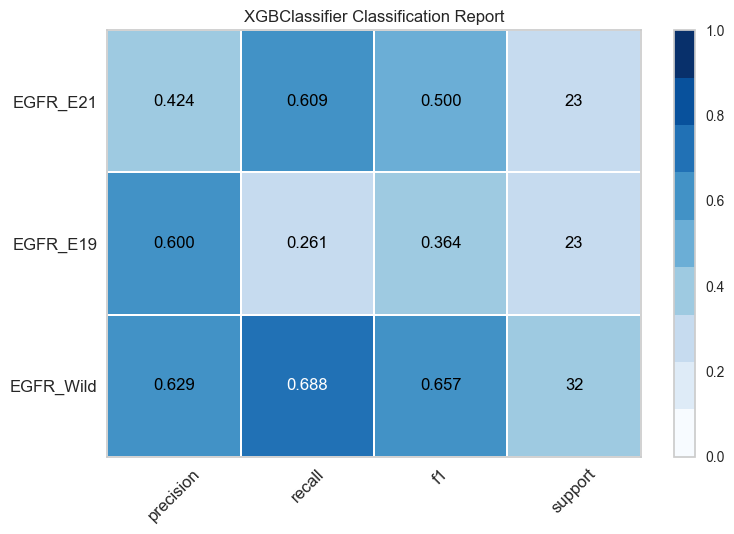

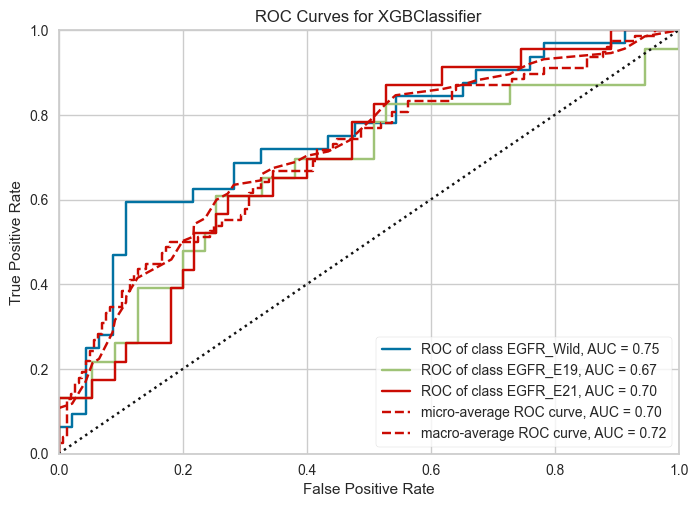

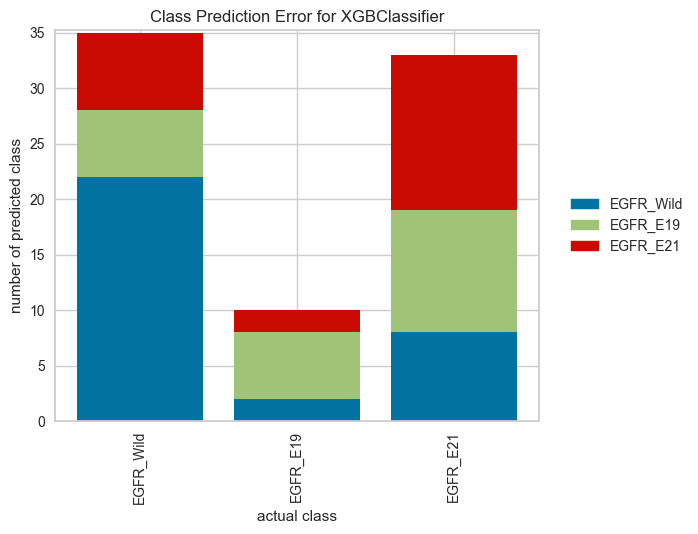

In [91]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [60]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}

In [61]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766
multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.6183423913043478

In [62]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-lgb73', Save_format = 'csv',Save_type = 'col')

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.59      0.59      0.59        32
    EGFR E19       0.43      0.29      0.34        21
    EGFR E21       0.38      0.48      0.42        25

    accuracy                           0.47        78
   macro avg       0.47      0.45      0.45        78
weighted avg       0.48      0.47      0.47        78

precision 0.46577380952380953 accuracy 0.47435897435897434 recall 0.45315476190476184 auc 0.5931910370505152


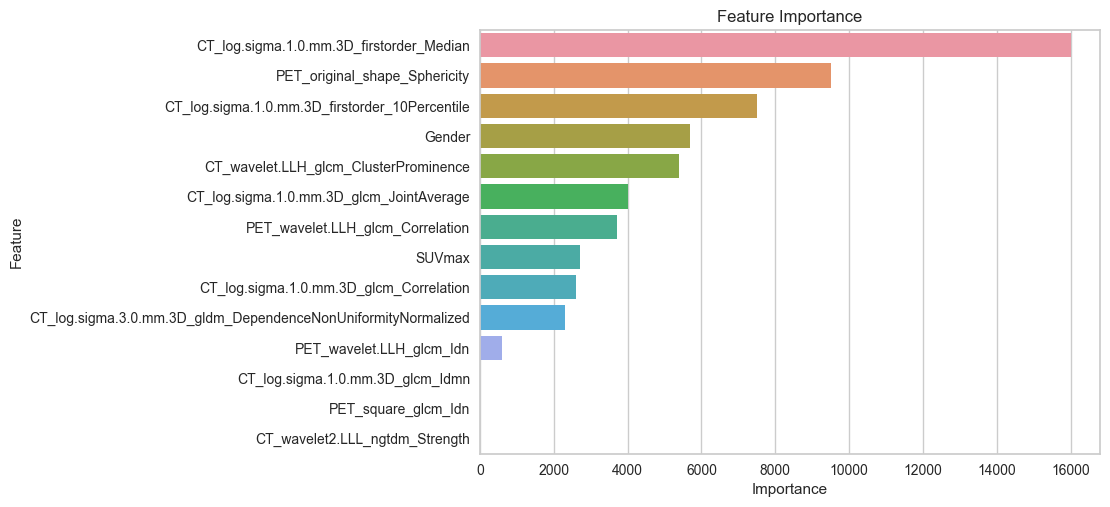

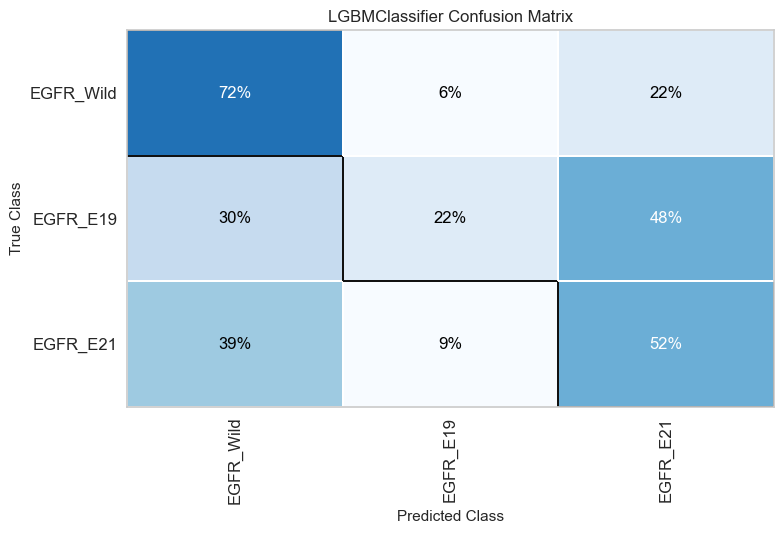

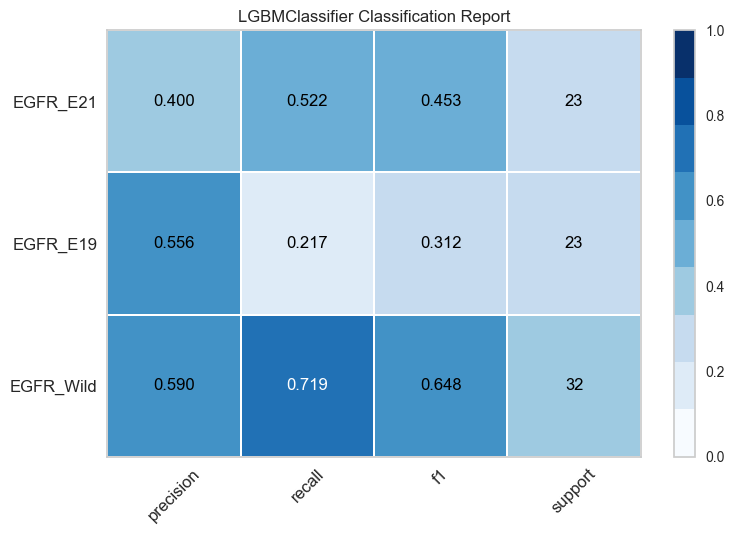

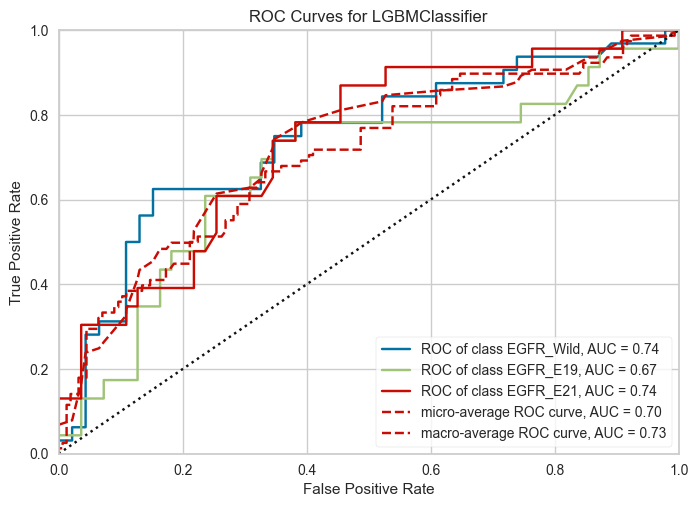

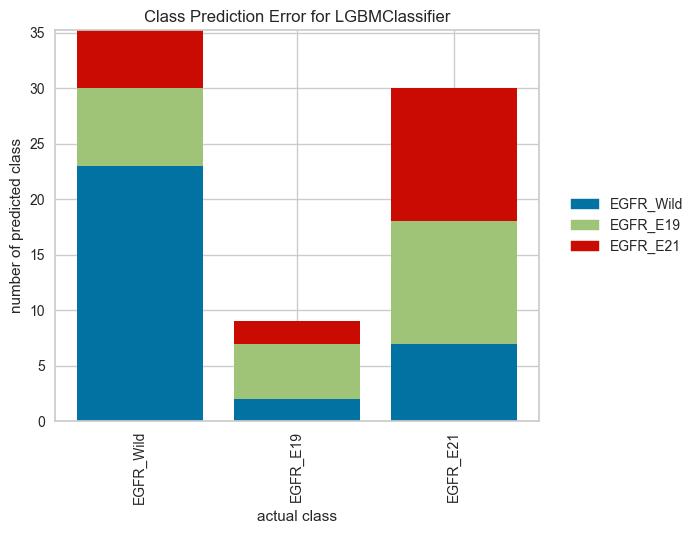

In [64]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [230]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
#     net_benefit_model = np.array([])
#     for thresh in thresh_group:
#         y_pred_label = y_pred_score > thresh
#         tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
#         n = len(y_label)
#         net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
#         net_benefit_model = np.append(net_benefit_model, net_benefit)
#     return net_benefit_model


# def calculate_net_benefit_all(thresh_group, y_label):
#     net_benefit_all = np.array([])
#     tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
#     total = tp + tn
#     for thresh in thresh_group:
#         net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
#         net_benefit_all = np.append(net_benefit_all, net_benefit)
#     return net_benefit_all


# def plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all):
#     #Plot
#     ax.plot(thresh_group, net_benefit_model, color = 'crimson', label = 'Model')
#     ax.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
#     ax.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')

#     #Fill，显示出模型较于treat all和treat none好的部分
#     y2 = np.maximum(net_benefit_all, 0)
#     y1 = np.maximum(net_benefit_model, y2)
#     ax.fill_between(thresh_group, y1, y2, color = 'crimson', alpha = 0.2)

#     #Figure Configuration， 美化一下细节
#     ax.set_xlim(0,1)
#     ax.set_ylim(net_benefit_model.min() - 0.15, net_benefit_model.max() + 0.15)#adjustify the y axis limitation
#     ax.set_xlabel(
#         xlabel = 'Threshold Probability', 
#         fontdict= {'family': 'Times New Roman', 'fontsize': 15}
#         )
#     ax.set_ylabel(
#         ylabel = 'Net Benefit', 
#         fontdict= {'family': 'Times New Roman', 'fontsize': 15}
#         )
#     ax.grid('major')
#     ax.spines['right'].set_color((0.8, 0.8, 0.8))
#     ax.spines['top'].set_color((0.8, 0.8, 0.8))
#     ax.legend(loc = 'upper right')

#     return ax


# if __name__ == '__main__':
#     #构造一个分类效果不是很好的模型
#     y_pred_score = y_test
#     y_label = y_label

#     thresh_group = np.arange(0,1,0.1)
#     net_benefit_model = calculate_net_benefit_model(thresh_group, y_pred_score, y_label)
#     net_benefit_all = calculate_net_benefit_all(thresh_group, y_label)
#     fig, ax = plt.subplots()
#     ax = plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all)
#     # fig.savefig('fig1.png', dpi = 300)
#     plt.show()


In [92]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)

In [93]:
# visualize the first prediction's explanation
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [94]:
# shap.dependence_plot(y_train, shap_values, X_train)

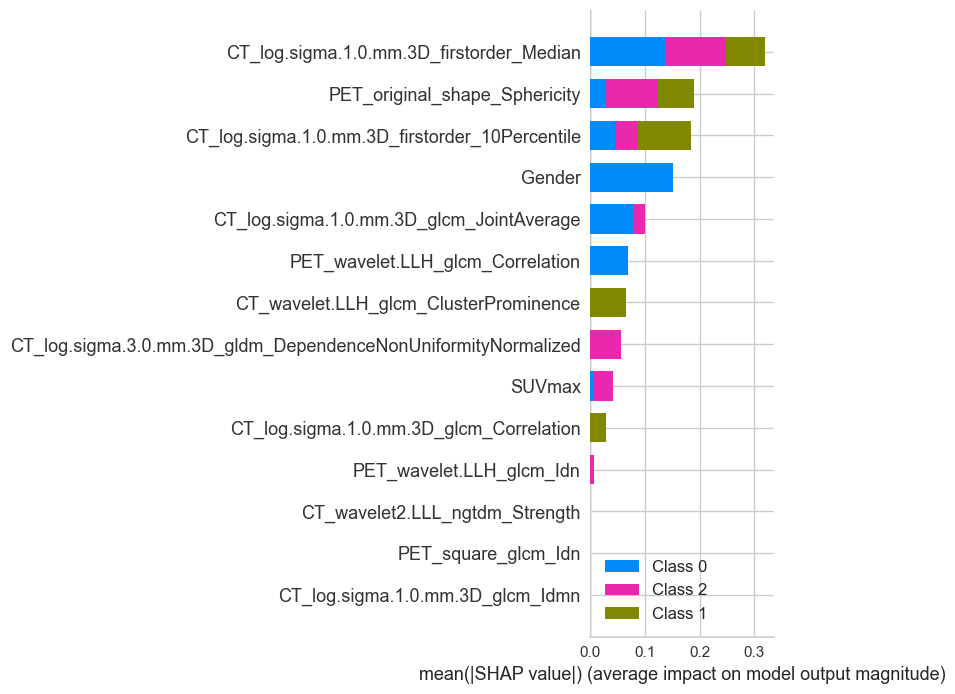

In [95]:
shap.summary_plot(shap_values[0:], X_train)

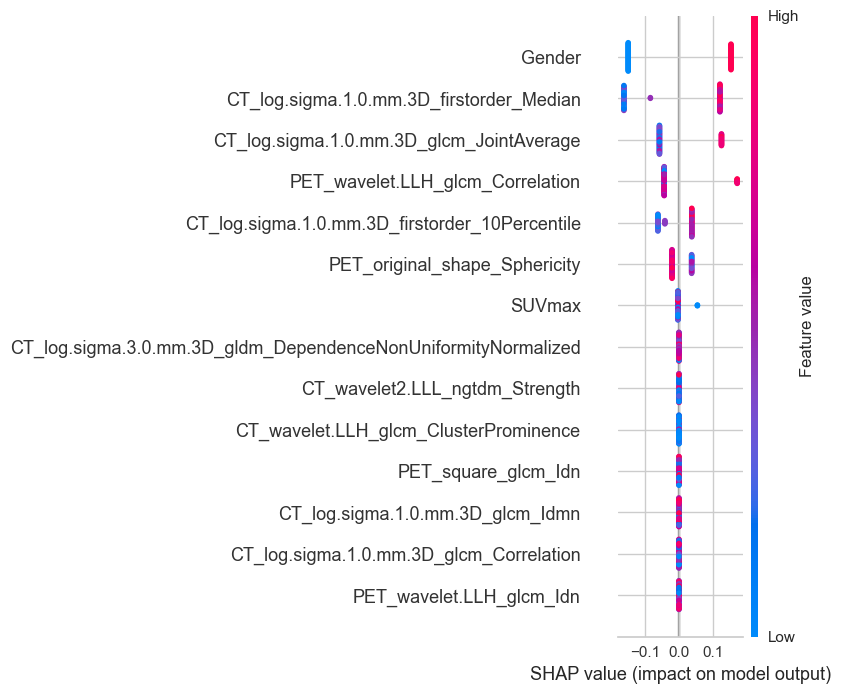

In [96]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)

In [97]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

df = pd.read_csv('data/titanic.csv', 
                 usecols = num_cols+cat_cols+[target])

X = df.copy()
y = X.pop(target)

X.sample(5)

In [ ]:
X['Sex'] = X['Sex'].map({'male':0, 'female':1})
X['Embarked'] = X['Embarked'].map({'S':1, 'C':2, 'Q':3})

X = X.fillna(X.mode().loc[0])
X.head()

In [ ]:
model = LGBMClassifier()
model.fit(X, y)
model.score(X, y)

In [107]:
# # visualize the first prediction's explanation
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [108]:
# # LightGBMClassifier # 0.857143

# lgbm_model = LGBMClassifier(random_state=42)
# lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
#                "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
#                "max_depth": [1,2,3,4, 5,6, 8,None]}

# lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
# lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

In [109]:
# # Final Model
# lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
# y_pred = lgbm_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8766233766233766
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
# # auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

In [110]:
# Data = {'label':y_test, 'y_pred':y_pred}
# Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RFELR-lgb73', Save_format = 'csv',Save_type = 'col')

In [111]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import missingno as msno

# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from ngboost import NGBClassifier

# import os
# import pickle

# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
# from yellowbrick.model_selection import LearningCurve, FeatureImportances


# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# pd.pandas.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # # Load the model that we saved before
# data1 = pd.read_csv("Inter-test-for-auc-dca-RFELR-lgb73.csv")
# external_test_pred=data1.y_pred
# external_test_label=data1.label
# # auc = roc_auc_score(external_test_label, external_test_pred)
# # multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# # f1_score = f1_score(external_test_label, external_test_pred)
# # f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
# class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
# print(classification_report(external_test_label, external_test_pred, target_names=class_names))
# print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

In [112]:
# # Visualization of Results --> Feature Importances
# plot_feature_importances(lgbm_tuned)
# # report_results_quickly(lgbm_tuned)
# plot_results(lgbm_tuned)
# # plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.640082
RF: 0.650358
XGBoost: 0.642712
LightGBM: 0.618342
SVM: 0.568404
GBDT: 0.649765
AdaBoost: 0.597789

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.635          0.640
1                  RF           0.779          0.650
2             XGBoost           0.672          0.643
3            LightGBM           0.649          0.618
4                 SVM           0.606          0.568
5                GBDT           0.869          0.650
6            AdaBoost           0.610          0.598


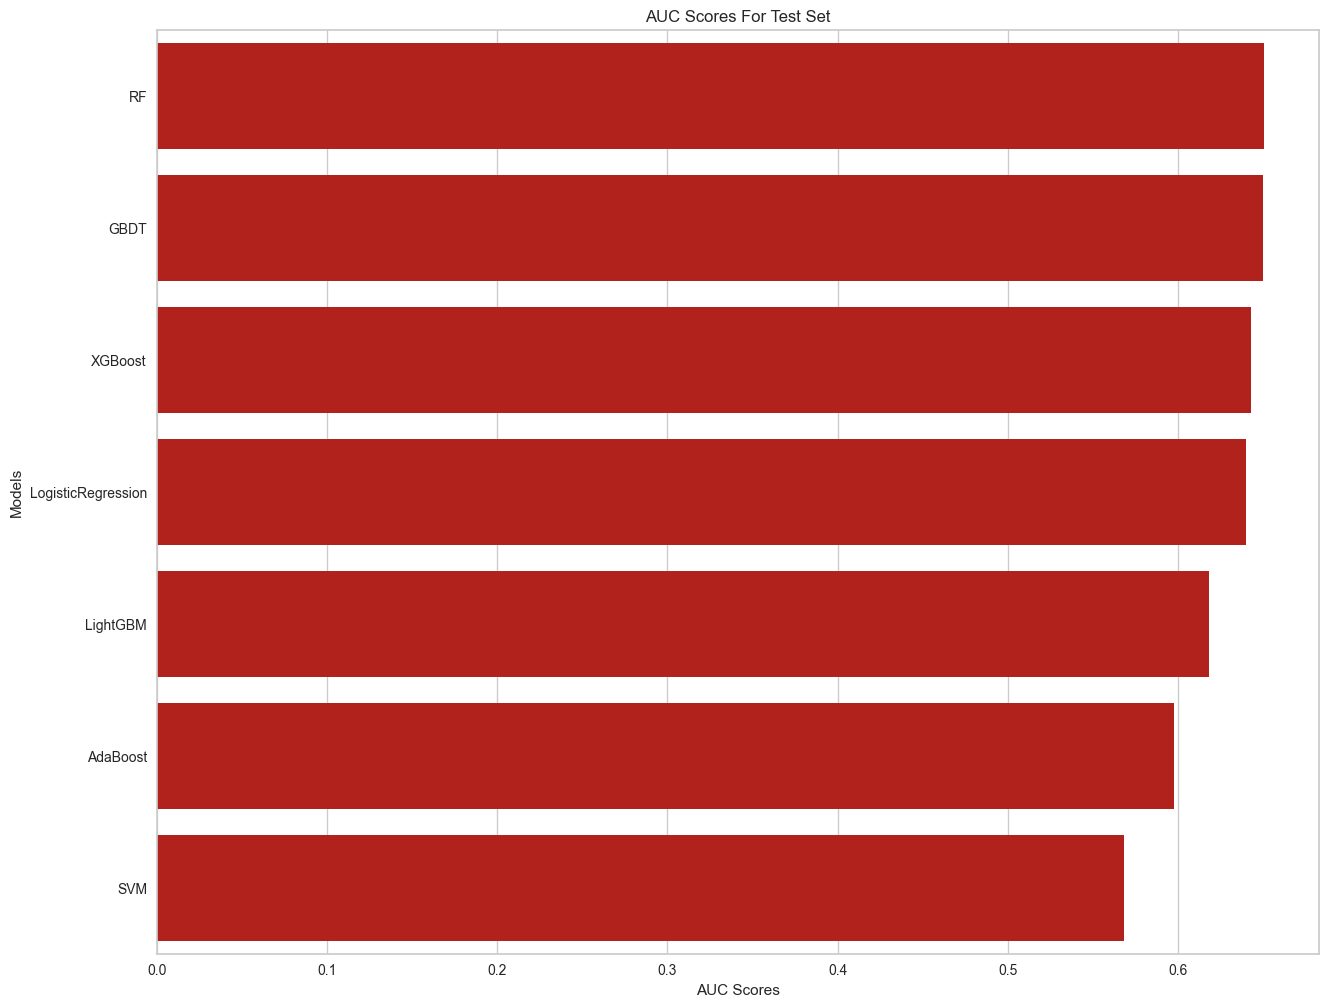

In [98]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
#                ('CatBoost', cb_tuned),
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
#                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

################ Accuracy scores for test set for the models: ################

stack model: 0.590143

################ Train and test results for the model: ################

        models  accuracy_train  accuracy_test
0  stack model           0.685          0.590


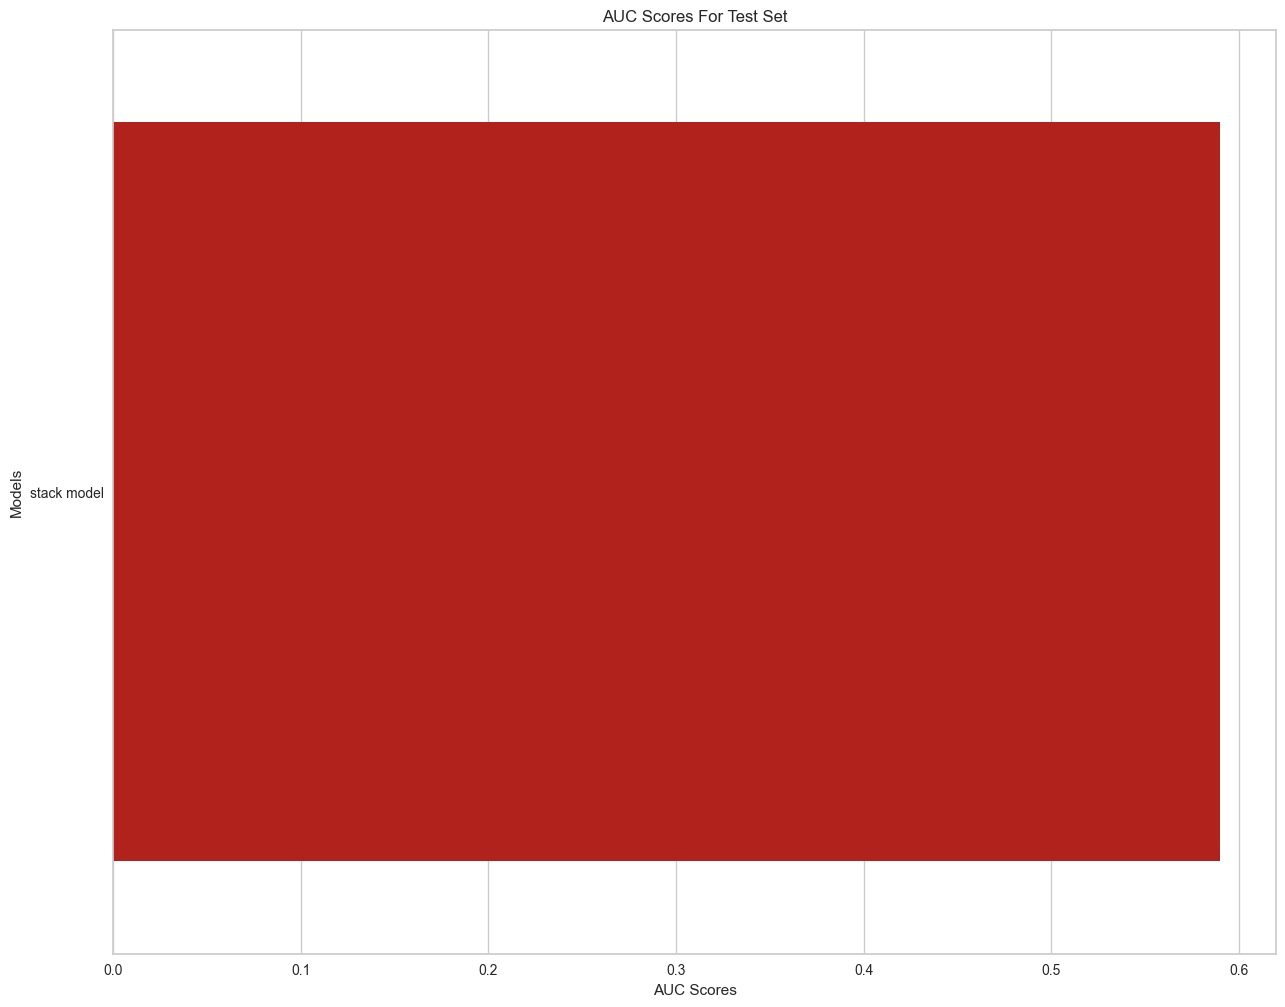

In [99]:
# # Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,svm_tuned,gbdt_tuned,adb_tuned), meta_classifier=lgbm_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890BLEND


In [100]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.1 * logreg_tuned.predict(X_test)) +
            
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.2 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.2 * lgbm_tuned.predict(X_test)) +
            
            
            (0.1 * stack_gen_model.predict(X_test)))

In [101]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# roc_auc_score(y_test, blend_models_predict(X_test).round())
multiclass_roc_auc_score(y_test, blend_models_predict(X_test).round(), average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
# auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")

0.6227519762845849

In [102]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-BLEND', Save_format = 'csv',Save_type = 'col')

In [103]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-PETCT-CLINIC-SVM4-BLEND.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =multiclass_roc_auc_score(external_test_label, external_test_pred, average="macro")
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.63      0.69      0.66        32
    EGFR E19       0.60      0.26      0.36        23
    EGFR E21       0.42      0.61      0.50        23

    accuracy                           0.54        78
   macro avg       0.55      0.52      0.51        78
weighted avg       0.56      0.54      0.52        78

precision 0.550937950937951 accuracy 0.5384615384615384 recall 0.5190217391304348 auc 0.6427124505928853


In [ ]:
# Visualization of Results --> Feature Importances
plot_feature_importances(# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned))
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [104]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PT-CLINIC-MODEL/SVM4")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [105]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [106]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = 'C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PETCT-CLINIC/EXTest_data-PETCT-CLINIC-SVM.csv'
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])
external_test.shape

(88, 14)

In [107]:
OSPath = "C:/Users/zuoya/Desktop/TripleClassification/Original_Filters/478cases-raw/PT-CLINIC-MODEL/SVM4"

In [108]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

In [109]:
######adaboost  测试集1
import numpy as np
import pickle
# # Load the model that we saved before
pathpkl = '/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
external_test_pred_proba=adb.predict_proba(external_test)
path = './ex-test-for-auc-dca-adb-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
# print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


0.7219205420959808
              precision    recall  f1-score   support

   EGFR Wild       0.67      0.79      0.73        42
    EGFR_E19       0.00      0.00      0.00        27
    EGFR_E21       0.36      0.74      0.48        19

    accuracy                           0.53        88
   macro avg       0.34      0.51      0.40        88
weighted avg       0.40      0.53      0.45        88



In [110]:
# print(external_test_label)

In [111]:
# print(external_test_pred_proba)

3


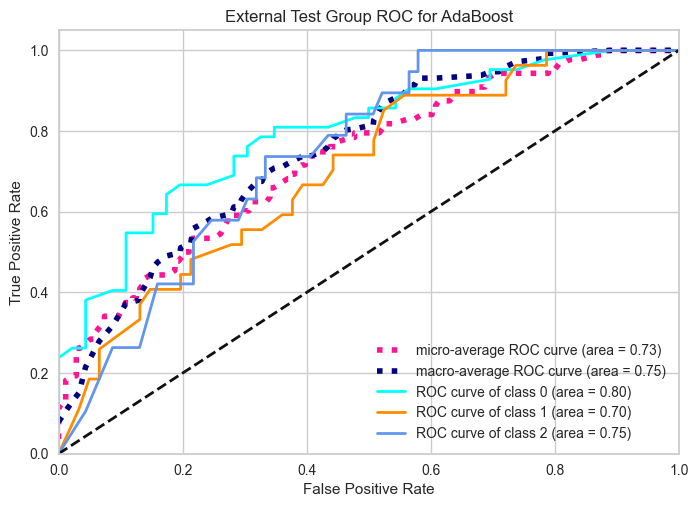

In [112]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for AdaBoost')
plt.legend(loc="lower right")
plt.show()

In [113]:
# ######adaboost  测试集1
# #############画图部分
# # from sklearn.datasets import load_breast_cancer
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier
# # from sklearn.model_selection import train_test_split
# import pylab as plt
# import warnings;warnings.filterwarnings('ignore')
# fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
# roc_auc = metrics.auc(fpr, tpr)
# plt.figure(figsize=(6,6))
# plt.title('External Test Group1 ROC for AdaBoost')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()



In [114]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33  0  9]
 [11  0 16]
 [ 5  0 14]]
Normalized confusion matrix
[[0.79 0.   0.21]
 [0.41 0.   0.59]
 [0.26 0.   0.74]]


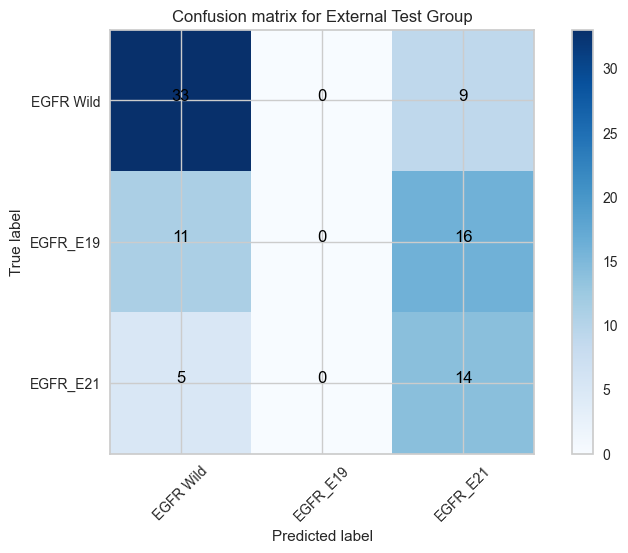

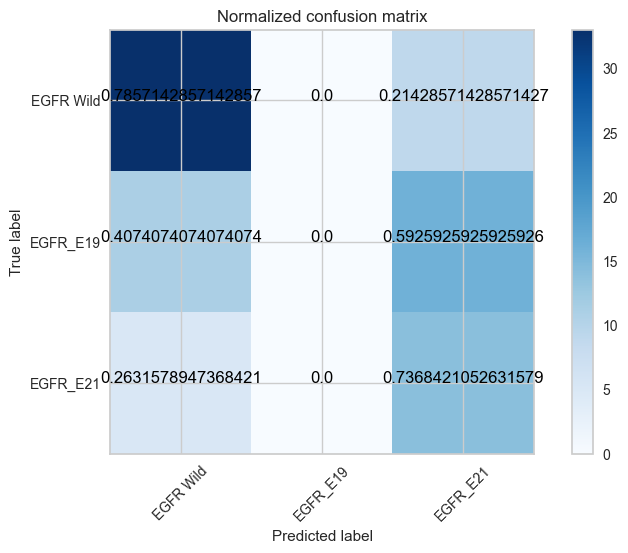

In [115]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [116]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
external_test_pred_proba=xgb.predict_proba(external_test)
path = '/ex-test-for-auc-dca-xgb-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
# print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


0.7529239766081872
              precision    recall  f1-score   support

   EGFR Wild       0.70      0.71      0.71        42
    EGFR_E19       0.38      0.11      0.17        27
    EGFR_E21       0.38      0.74      0.50        19

    accuracy                           0.53        88
   macro avg       0.48      0.52      0.46        88
weighted avg       0.53      0.53      0.50        88



3


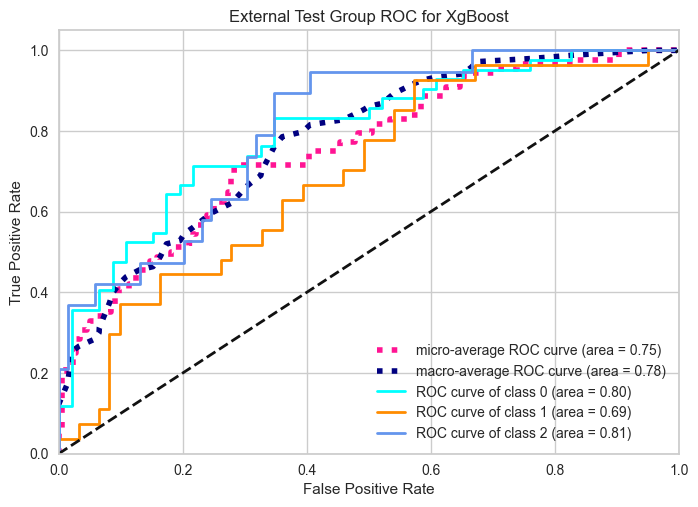

In [117]:
######XGB  测试集1
#############画图部分
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for XgBoost')
plt.legend(loc="lower right")
plt.show()



In [118]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  3  9]
 [10  3 14]
 [ 3  2 14]]
Normalized confusion matrix
[[0.71 0.07 0.21]
 [0.37 0.11 0.52]
 [0.16 0.11 0.74]]


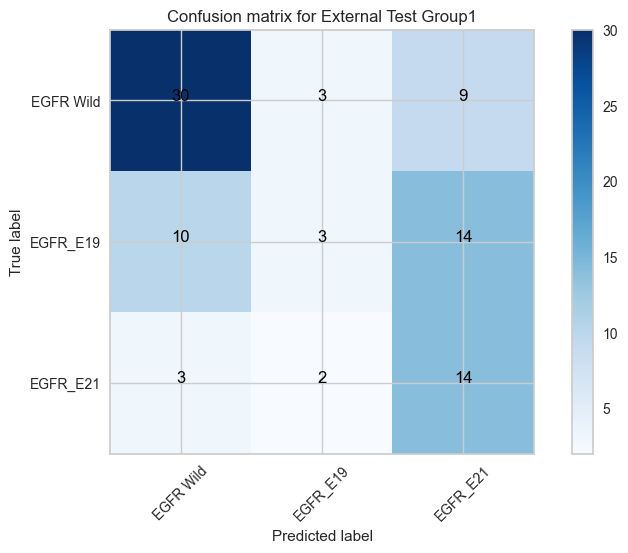

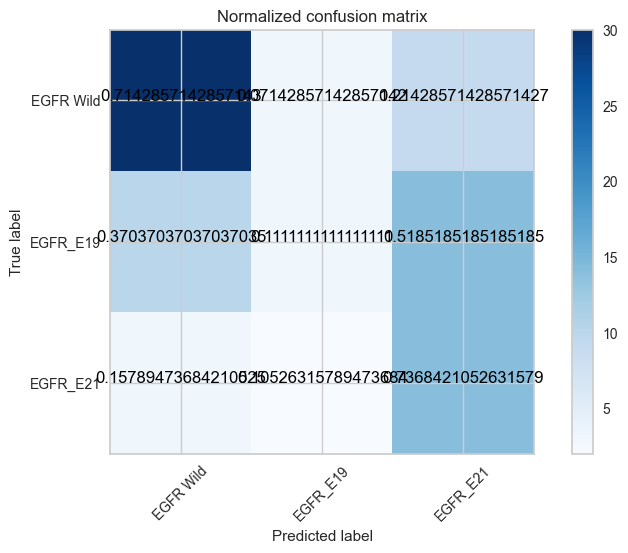

In [119]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [120]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
external_test_pred_proba=rft.predict_proba(external_test)
path = '/ex-test-for-auc-dca-RF-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))

0.7375460255577216
              precision    recall  f1-score   support

   EGFR Wild       0.67      0.76      0.71        42
    EGFR_E19       0.38      0.11      0.17        27
    EGFR_E21       0.41      0.68      0.51        19

    accuracy                           0.55        88
   macro avg       0.48      0.52      0.46        88
weighted avg       0.52      0.55      0.50        88



3


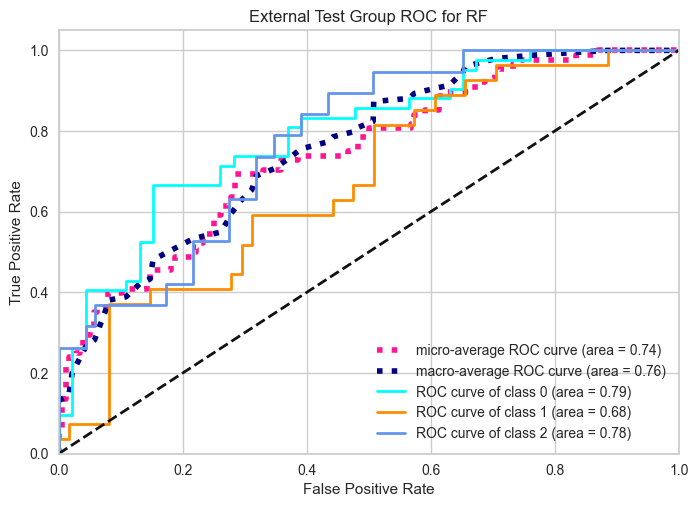

In [121]:
#####RF  测试集1
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for RF')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[32  3  7]
 [12  3 12]
 [ 4  2 13]]
Normalized confusion matrix
[[0.76 0.07 0.17]
 [0.44 0.11 0.44]
 [0.21 0.11 0.68]]


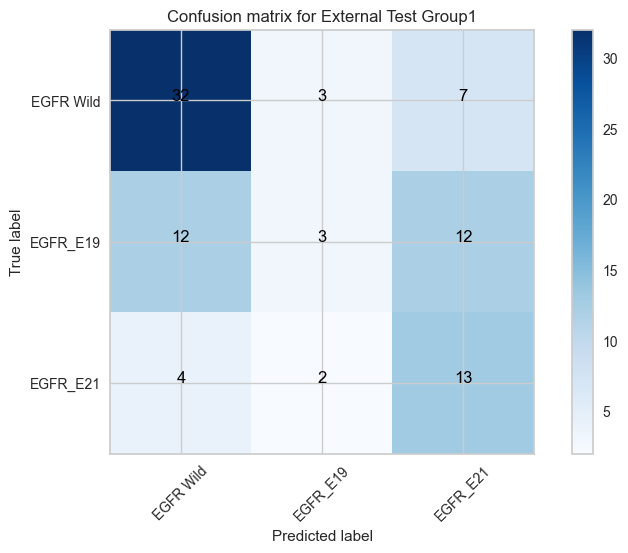

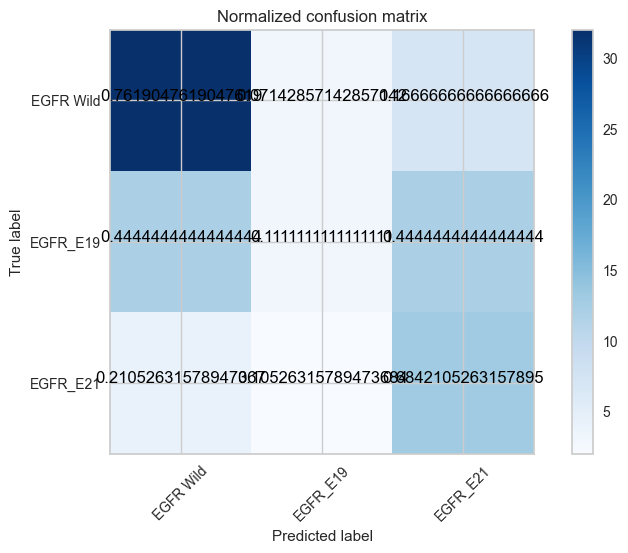

In [122]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
external_test_pred_proba=lrt.predict_proba(external_test)
path = '/ex-test-for-auc-dca-lr-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))

0.6513970110461339
              precision    recall  f1-score   support

   EGFR Wild       0.70      0.67      0.68        42
    EGFR_E19       0.47      0.26      0.33        27
    EGFR_E21       0.33      0.58      0.42        19

    accuracy                           0.52        88
   macro avg       0.50      0.50      0.48        88
weighted avg       0.55      0.52      0.52        88



3


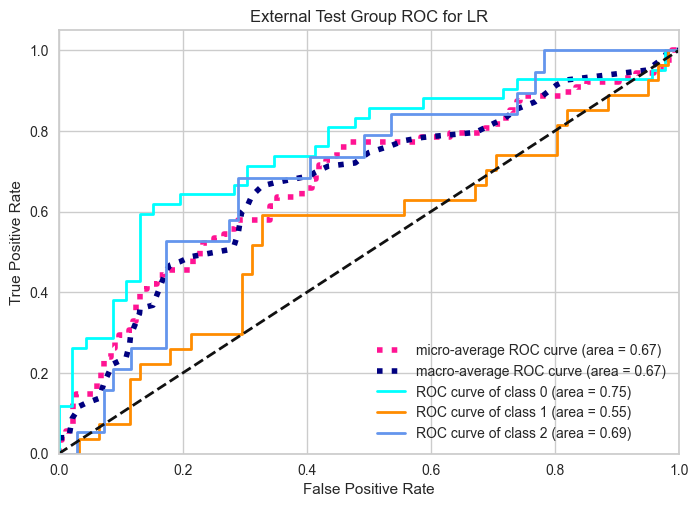

In [124]:
######LR 测试集1
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for LR')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[28  6  8]
 [ 6  7 14]
 [ 6  2 11]]
Normalized confusion matrix
[[0.67 0.14 0.19]
 [0.22 0.26 0.52]
 [0.32 0.11 0.58]]


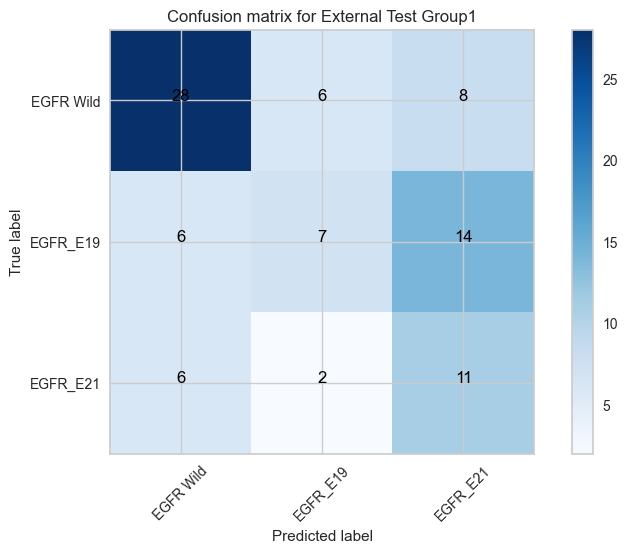

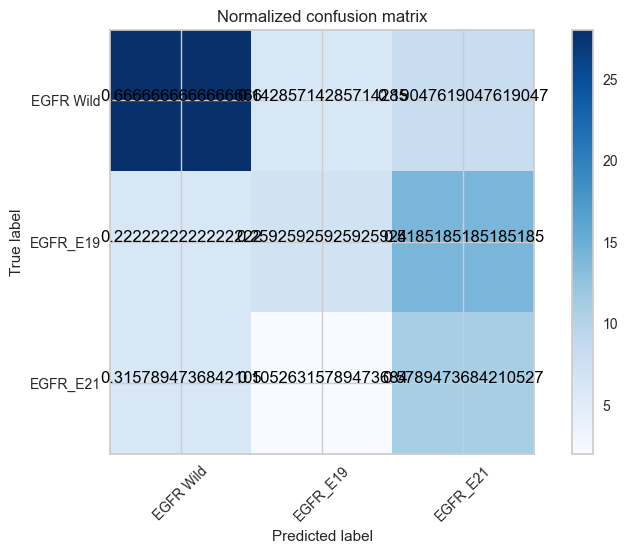

In [125]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [126]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
external_test_pred_proba=GBDT.predict_proba(external_test)
path = '/ex-test-for-auc-dca-GBDT-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))

0.7228565240261148
              precision    recall  f1-score   support

   EGFR Wild       0.67      0.79      0.73        42
    EGFR_E19       0.38      0.11      0.17        27
    EGFR_E21       0.42      0.68      0.52        19

    accuracy                           0.56        88
   macro avg       0.49      0.53      0.47        88
weighted avg       0.53      0.56      0.51        88



3


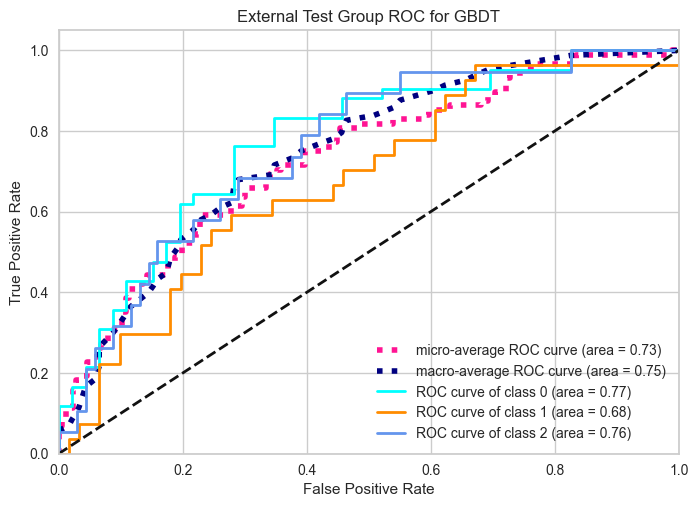

In [127]:
##GBDT 测试集1
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for GBDT')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[33  2  7]
 [13  3 11]
 [ 3  3 13]]
Normalized confusion matrix
[[0.79 0.05 0.17]
 [0.48 0.11 0.41]
 [0.16 0.16 0.68]]


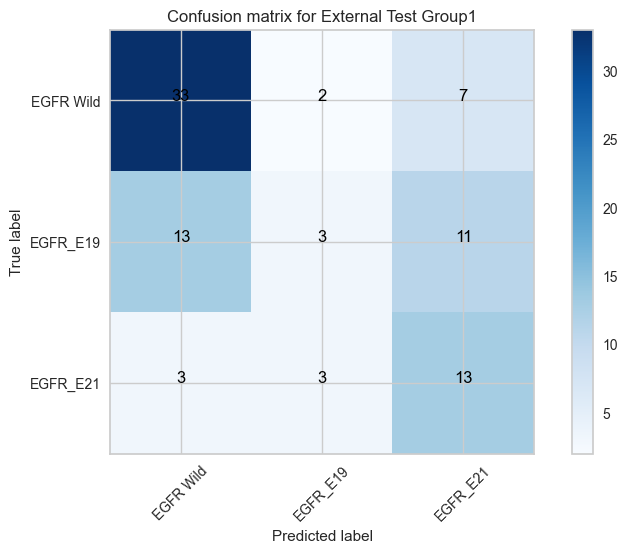

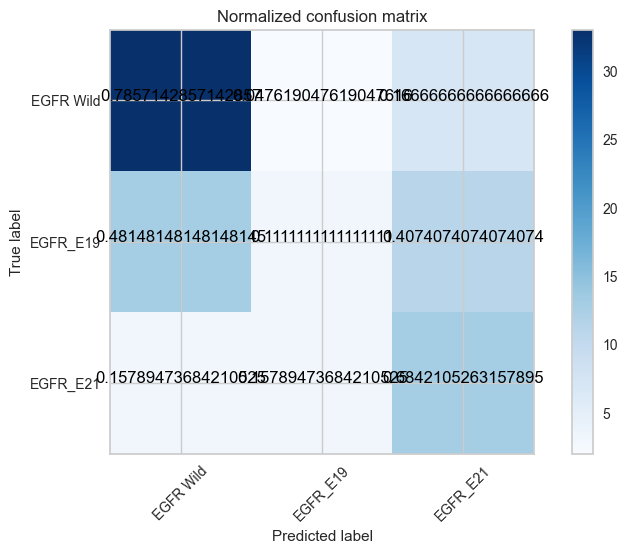

In [128]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [129]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/ex-test-for-auc-dca-SVM-CT-SVM4-LR-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
# roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# auc =roc_auc_score(external_test_label, external_test_pred, average="macro")
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

0.7228565240261148
              precision    recall  f1-score   support

   EGFR Wild       0.67      0.71      0.69        42
    EGFR_E19       0.00      0.00      0.00        27
    EGFR_E21       0.28      0.63      0.39        19

    accuracy                           0.48        88
   macro avg       0.32      0.45      0.36        88
weighted avg       0.38      0.48      0.41        88

precision 0.550937950937951 accuracy 0.5384615384615384 recall 0.5190217391304348 auc 0.7228565240261148


3


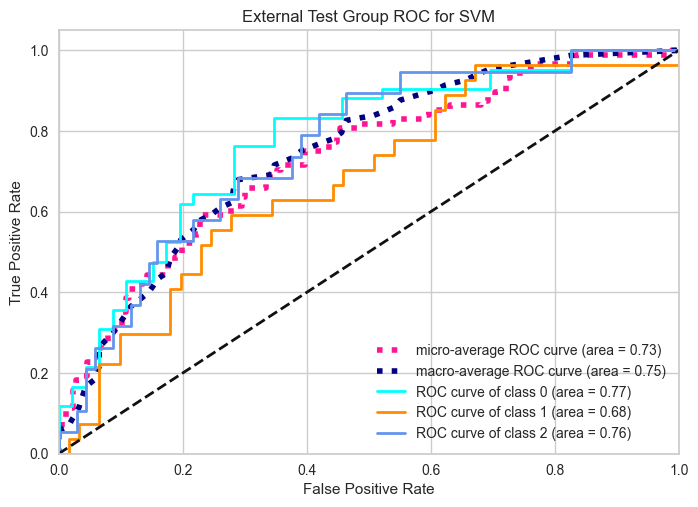

In [130]:
##svm 测试集1
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for SVM')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[30  0 12]
 [ 8  0 19]
 [ 7  0 12]]
Normalized confusion matrix
[[0.71 0.   0.29]
 [0.3  0.   0.7 ]
 [0.37 0.   0.63]]


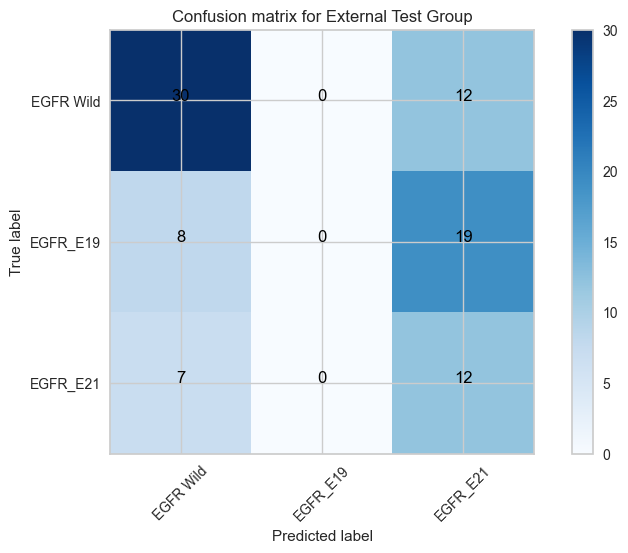

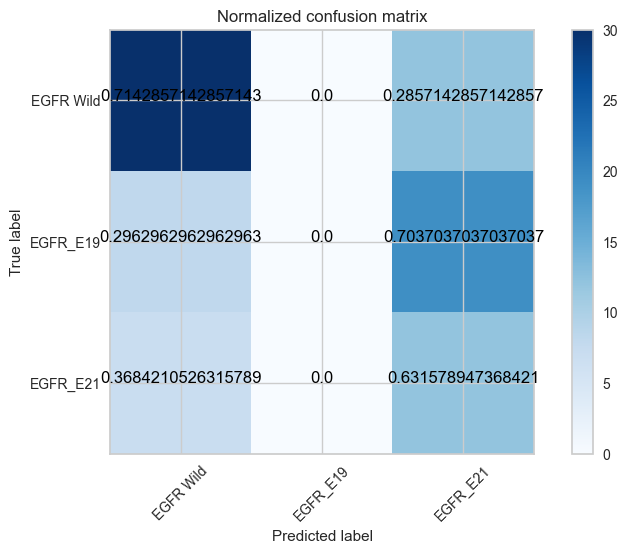

In [131]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [132]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
external_test_pred_proba=lgbt.predict_proba(external_test)

path = '/ex-test-for-auc-dca-lgb-PETCT-CLINIC-SVM4-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
# auc = roc_auc_score(external_test_label, external_test_pred)
# multiclass_roc_auc_score(y_test, y_pred, average="macro")
auc =roc_auc_score(external_test_label, external_test_pred_proba,  multi_class='ovo')
print(auc)
# precision = precision_score(external_test_label, external_test_pred, pos_label=1, multi_class='ovo', sample_weight=None)
# accuracy = accuracy_score(external_test_label, external_test_pred)
# recall = recall_score(external_test_label, external_test_pred, multi_class='ovo', pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR Wild','EGFR_E19', 'EGFR_E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))

0.7659348989758347
              precision    recall  f1-score   support

   EGFR Wild       0.68      0.81      0.74        42
    EGFR_E19       0.33      0.04      0.07        27
    EGFR_E21       0.40      0.74      0.52        19

    accuracy                           0.56        88
   macro avg       0.47      0.53      0.44        88
weighted avg       0.51      0.56      0.49        88



3


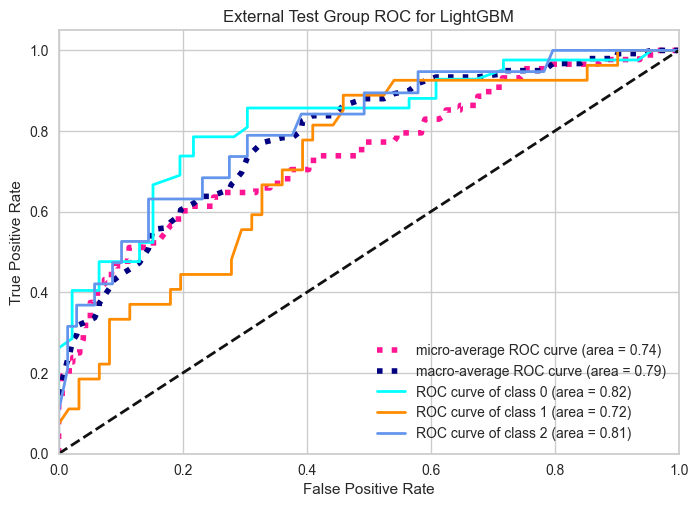

In [133]:
##lgb 测试集1
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# # 加载数据
# iris = datasets.load_iris()
# x = iris.data
y = external_test_label
# # # 将标签二值化 即：变成[1 0 0] [0 0 1] [0 1 0]

y = label_binarize(y, classes=[0, 1, 2])
# print("y二值化",y)
# # # # 设置种类
n_classes = y.shape[1]
print(n_classes)
# n_classes=[0, 1, 2]
# # 训练模型并预测
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape

# # shuffle and split training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(x_train, y_train).decision_function(x_test)
y_score = external_test_pred_proba
y_test = y
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 遍历三个类别
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # # Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('External Test Group ROC for LightGBM')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[34  2  6]
 [11  1 15]
 [ 5  0 14]]
Normalized confusion matrix
[[0.81 0.05 0.14]
 [0.41 0.04 0.56]
 [0.26 0.   0.74]]


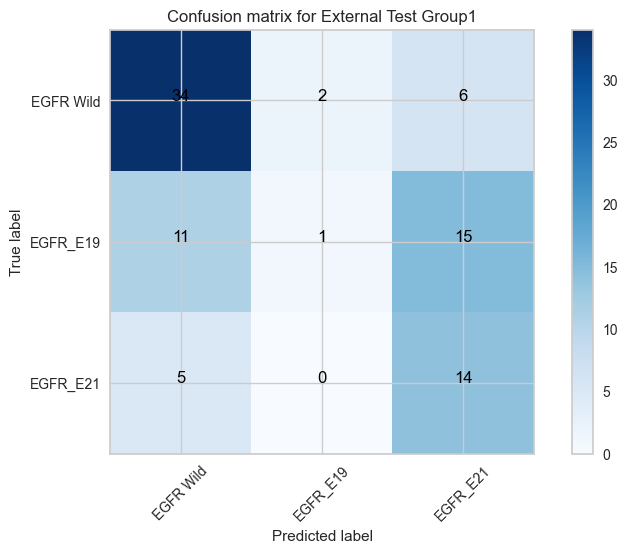

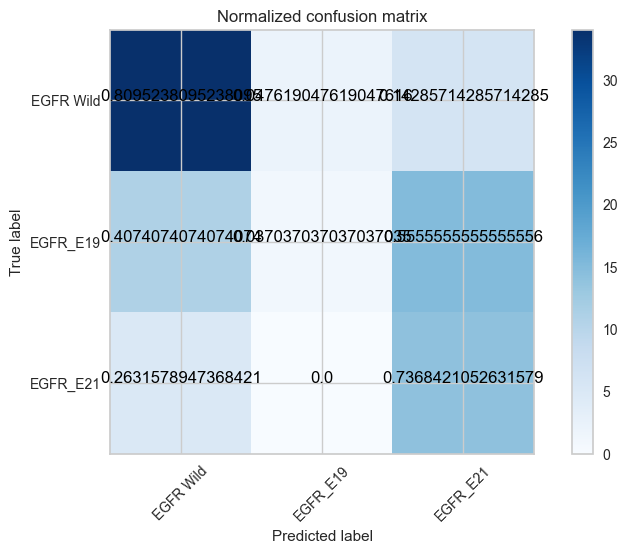

In [134]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()